# **Predicting the Number of Marriages in Swiss Cantons in Different Age Groups from 1981-2024 Onwards**


This is the final file, documenting our approach after that done on the "First Version (Original) Marriages" file.

**Assumptions in our project:**

- We are predicting the number of marriages in a specific canton in a specific age group. In the context of our business solution, we are in fact interested in the number of weddings occurring, therefore, we assume that most marriages will have a wedding.

- We assume that marriages take time to materialize, therefore, in order to predict the number of marriages in a specific year 'Y' (e.g. 2017), we use independent variable data from the year 'Y-2' (e.g. 2015).

**Problem Being Solved and Business Implications**

Target Client for the Data App: **Wedding Planners**

Problem/Topic: **Predicting the Number of Marriages in Swiss Cantons in Different Age Groups from 1981-2024 Onwards**

The wedding industry is a complex and interconnected industry involving multiple sectors such as fashion, catering, entertainment, tourism, technology and marketing. Its functioning depends on the ability to plan and forecast the number of weddings planned to optimize resource allocation, venue availability management and coordination with suppliers. One crucial aspect is the reduction of booking and organizing time, considering that modern couples require quick and personalized service. Although a lot of research and preparation is required to plan a wedding, booking times are getting shorter and many couples want to visualize their dream in a short period of time. Therefore, wedding planners need to work more efficiently in order to arrange more and more weddings in less and less time.
In this context, the need to analyze the marriage market on a regional (by canton) and demographic (by age group) basis emerges. Each canton has unique characteristics in terms of culture, traditions, and demand. Therefore, a regional analysis of the number of marriages performed makes it possible to:
-	Customize offerings: tailor services to the prevailing traditions and tastes in each area.
-	Leverage local suppliers: collaborate with suppliers in the area for catering, decorations or other services, improving logistical efficiency and reducing costs.
-	Focus on high-demand areas: identify cantonments with a high number of weddings to focus marketing and operational efforts.

Equally important is the analysis of data by age group, as it allows wedding planners to:
-	Adapt the offer: age groups can influence the type of services requested, such as specific entertainment, photography etc. For example, young couples may prefer weddings that follow trends, while more mature couples may opt for more traditional options.
-	Develop targeted marketing: by knowing the prevailing age of couples, you can create advertising campaigns that speak directly to their preferences and needs, improving the effectiveness of promotions.
The availability and capacity of locations, especially during peak season (May to September) and on Saturday days, are additional operational constraints to consider. Therefore, the ability to predict and analyze these variables can improve operational effectiveness, service customization, and marketing strategies.


# **Data Handling**

In [ ]:
from google.colab import drive
import pandas as pd
from datetime import datetime

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Business Analytics und Data Science/BA2/"

Mounted at /content/drive


**Marriages Data**

First we select only the rows that are broken down into age ranges(are not total - _T). Then we convert the age ranges to match the age groups we have defined. This means that all the rows in with age group 20-24 and 25-29 they will all be converted to 20-29. Then we select only the rows where the age groups match, so we get just one marriage value per age group per canton. We also exclude the nationwide data (!= CH), because we only want canton data. Then we change the name of the cantons to match the ones we define in canton_mapping. Finally we group and add up the marrgies per age group because ,as we mentioned, for one current age group there are multiples values due to the previous smaller age groups.

In [ ]:
marriages = pd.read_csv(path + "marriages.csv")
marriages = marriages[
    ~marriages['AGE_PARTNER1'].isin(['_T', 'YB0']) &
    ~marriages['AGE_PARTNER2'].isin(['_T', 'YB0'])
]

# Update AGE groups to be in 10-year intervals
age_intervals = {
    'Y0T4': '0-9',
    'Y5T9': '0-9',
    'Y10T14': '10-19',
    'Y15T19': '10-19',
    'Y20T24': '20-29',
    'Y25T29': '20-29',
    'Y30T34': '30-39',
    'Y35T39': '30-39',
    'Y40T44': '40-49',
    'Y45T49': '40-49',
    'Y50T54': '50-59',
    'Y55T59': '50-59',
    'Y60T64': '60-69',
    'Y65T69': '60-69',
    'Y70T74': '70-79',
    'Y75T79': '70-79',
    'Y80T84': '80-89',
    'Y85T89': '80-89',
    'Y_GE90': '90-99'
}

marriages['AGE_PARTNER1'] = marriages['AGE_PARTNER1'].map(age_intervals)
marriages['AGE_PARTNER2'] = marriages['AGE_PARTNER2'].map(age_intervals)

marriages = marriages[
    (marriages['AGE_PARTNER1'] == marriages['AGE_PARTNER2']) &  # Matching age groups
    (marriages['CANTON'] != 'CH')  # Exclude canton CH
]

marriages['AGE_GROUP'] = marriages['AGE_PARTNER1']
marriages = marriages.drop(columns=['AGE_PARTNER1', 'AGE_PARTNER2'])

canton_mapping = {
    '1': 'Zürich',
    '2': 'Bern / Berne',
    '3': 'Luzern',
    '4': 'Uri',
    '5': 'Schwyz',
    '6': 'Obwalden',
    '7': 'Nidwalden',
    '8': 'Glarus',
    '9': 'Zug',
    '10': 'Fribourg / Freiburg',
    '11': 'Solothurn',
    '12': 'Basel-Stadt',
    '13': 'Basel-Landschaft',
    '14': 'Schaffhausen',
    '15': 'Appenzell Ausserrhoden',
    '16': 'Appenzell Innerrhoden',
    '17': 'St. Gallen',
    '18': 'Graubünden / Grigioni / Grischun',
    '19': 'Aargau',
    '20': 'Thurgau',
    '21': 'Ticino',
    '22': 'Vaud',
    '23': 'Valais / Wallis',
    '24': 'Neuchâtel',
    '25': 'Genève',
    '26': 'Jura'
}

# Apply the mapping to the canton column
marriages['CANTON'] = marriages['CANTON'].replace(canton_mapping)
marriages = marriages.rename(columns={'YEAR': 'Year', 'CANTON': 'Canton', 'AGE_GROUP': 'Age Group','OBS_VALUE': 'marriages'})

marriages = marriages.groupby(['Year', 'Canton', 'Age Group'])['marriages'].sum().reset_index()

marriages.head()

<ipython-input-2-f3dcd83965d0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marriages['AGE_GROUP'] = marriages['AGE_PARTNER1']


Year  Canton Age Group  marriages
0  1969  Aargau     10-19         14
1  1969  Aargau     20-29       2078
2  1969  Aargau     30-39        109
3  1969  Aargau     40-49         37
4  1969  Aargau     50-59         32

**Births Data**

First, we select all the rows that are not nationwide (!= CH), only the rows that are broken down into age ranges (!= _T) and the rows are not broken down by the sex of the child(== T), becuase as we saw in the previous file female and male births are highly correlatd and could lead to problems of colinearity. Then we convert the age ranges to match the age groups we previously defined and do the same to the cantons. Then we group the age groups together because when we changed them to match our age groups, if we had age of the mother 10-14 for one row, and 15-19 for another row, this would all be 10-19, so we sum them up. Then we turn the SEX_CHILD column into two columns Births_Female, and Births_Male.

In [ ]:
births = pd.read_csv(path + "Births_Canton.csv")
births = births[(births['CANTON'] != 'CH') &(births['AGE_MOTHER'] != '_T') & (births['SEX_CHILD'] == 'T')]
births['AGE_MOTHER'] = births['AGE_MOTHER'].map(age_intervals)
births['CANTON'] = births['CANTON'].replace(canton_mapping)
births = births.rename(columns={'YEAR': 'Year', 'CANTON': 'Canton', 'AGE_MOTHER': 'Age Group','OBS_VALUE': 'Births'})
births = births.groupby(['Year', 'Canton', 'Age Group'])['Births'].sum().reset_index()
births.head()

Year  Canton Age Group  Births
0  1969  Aargau     10-19     367
1  1969  Aargau     20-29    5052
2  1969  Aargau     30-39    2303
3  1969  Aargau     40-49     257
4  1969  Aargau     50-59       0

**Divorces Data**

We first select the columns where the ages groups of both partners match (e.g 20-29 with 20-29). Then we rename the columns so they match the age group name of the other data frames. Finally we use pd.melt to turn the data from wide format to long format, meaning, we turn the age group columns to rows in a new Age Group column.

In [ ]:
divorces = pd.read_csv(path + "divorcesExtended.csv", encoding='latin1')
divorces.head()

Year        Canton  Less than 20 years Less than 20 years  \
0  1969        Zürich                                      0   
1  1969  Bern / Berne                                      0   
2  1969        Luzern                                      0   
3  1969           Uri                                      0   
4  1969        Schwyz                                      0   

   Less than 20 years 20-29 years  Less than 20 years 30-39 years  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Less than 20 years 40-49 years  Less than 20 years 50-59 years  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Less than 20 years 60-69 years  Less than 20 years 70-79 years  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Less than 20 years 80-89 years  ...  80-89 years 90 years or more  \
0                               0  ...                             0   
1                               0  ...                             0   
2                               0  ...                             0   
3                               0  ...                             0   
4                               0  ...                             0   

   90 years or more Less than 20 years  90 years or more 20-29 years  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   90 years or more 30-39 years  90 years or more 40-49 years  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   90 years or more 50-59 years  90 years or more 60-69 years  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   90 years or more 70-79 years  90 years or more 80-89 years  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   90 years or more 90 years or more  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 83 columns]

In [ ]:
matching_columns = [
    col for col in divorces.columns
    if " ".join(col.split()[:2]) == " ".join(col.split()[-2:])
]

matching_columns.insert(2, "Less than 20 years Less than 20 years")

divorces = divorces[matching_columns]

def extract_age_group(col):
    if col == "Less than 20 years Less than 20 years":
        return "10-19"  # Rename this specific case
    parts = col.split()  # Split the column name by spaces
    if len(parts) >= 2 and parts[:2] == parts[-2:]:  # Check if the age groups match
        return " ".join(parts[:2]).replace("years", "").strip()  # Return the first age group without "years"
    return col  # Return original column name if no match

# Rename columns
divorces.columns = [extract_age_group(col) for col in divorces.columns]
divorces = pd.melt(divorces, id_vars=['Year', 'Canton'], var_name='Age Group', value_name='Divorces')


divorces.head()

Year        Canton Age Group  Divorces
0  1969        Zürich     10-19         0
1  1969  Bern / Berne     10-19         0
2  1969        Luzern     10-19         0
3  1969           Uri     10-19         0
4  1969        Schwyz     10-19         0

We consider divorces as a possible feature, since people who get divorced may consider getting remarried in a subsequent year.

**GDP per Capita Data**

This is an excel file. Se select only rows 2-26 since the rest are information rows in excel and the first row will be our columns. Then we replace the name of the cantons to match the rest of the dataframes. Finally, we use pd.melt() to reshape the dataframe from wide format to long format. We also removed the GDP dataframe as this was causing high colinearity

In [ ]:
gdp_pc = pd.read_excel(path + "GDPperCapita.xlsx")

gdp_pc.columns = gdp_pc.iloc[1]  # Set the column names to the second row
gdp_pc = gdp_pc[2:]  # Drop the first two rows as they are now redundant
gdp_pc.reset_index(drop=True, inplace=True)
gdp_pc = gdp_pc.drop(index=0).iloc[:26]
gdp_pc = gdp_pc.rename(columns={'2022p': 2022})

gdp_pc['Canton'] = gdp_pc['Canton'].replace(canton_mapping)
gdp_pc = pd.melt(gdp_pc, id_vars=['Canton'], var_name='Year', value_name='GDP_pc')
gdp_pc.tail()

Canton  Year        GDP_pc
385       Vaud  2022   78021.25225
386     Valais  2022   61386.57416
387  Neuchâtel  2022  106165.29127
388     Geneva  2022  119643.62523
389       Jura  2022   78546.37592

**Extrapolating GDP Per Capita to 1990**

Since we only had data on GDP per capita from 2008 to 2022, we decided to extrapolate the data back to 1981. First we tried to extrapolate using the data we already had from 2008 onwards, without giving reference values of overall Swiss GDP in the years before 2008 to the model.

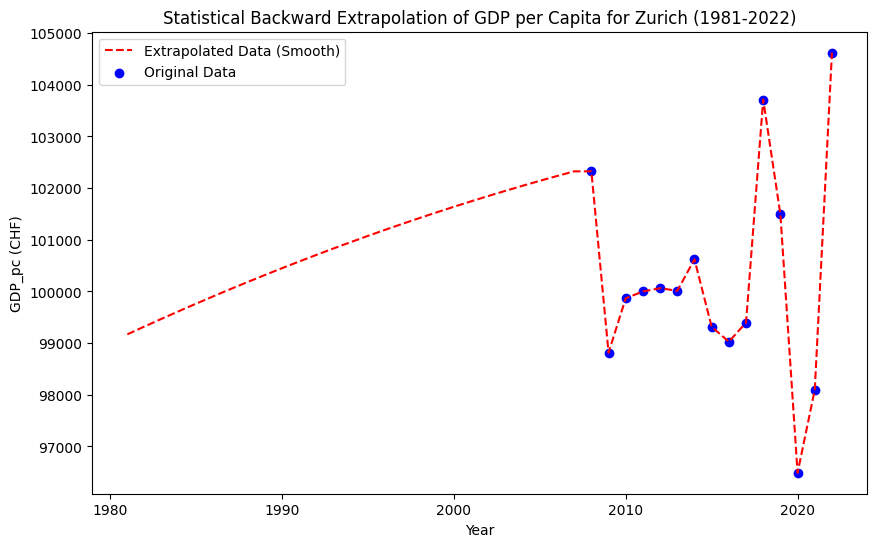

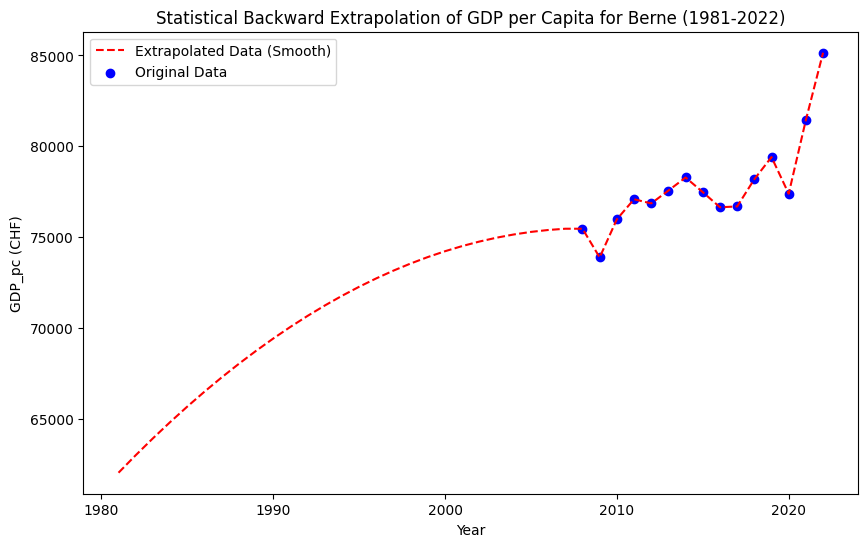

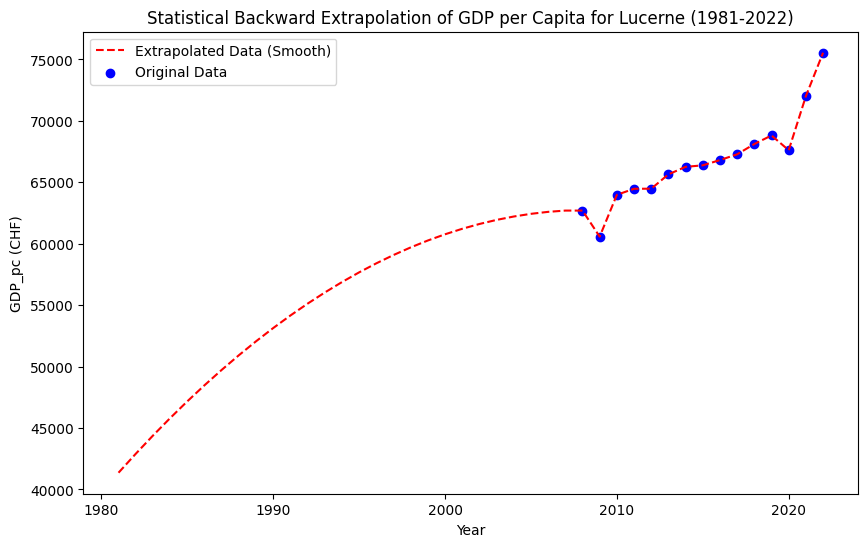

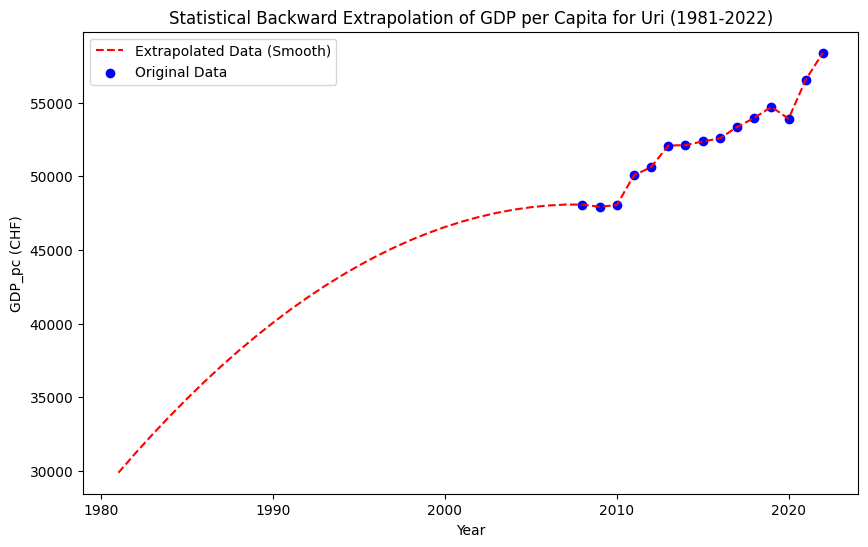

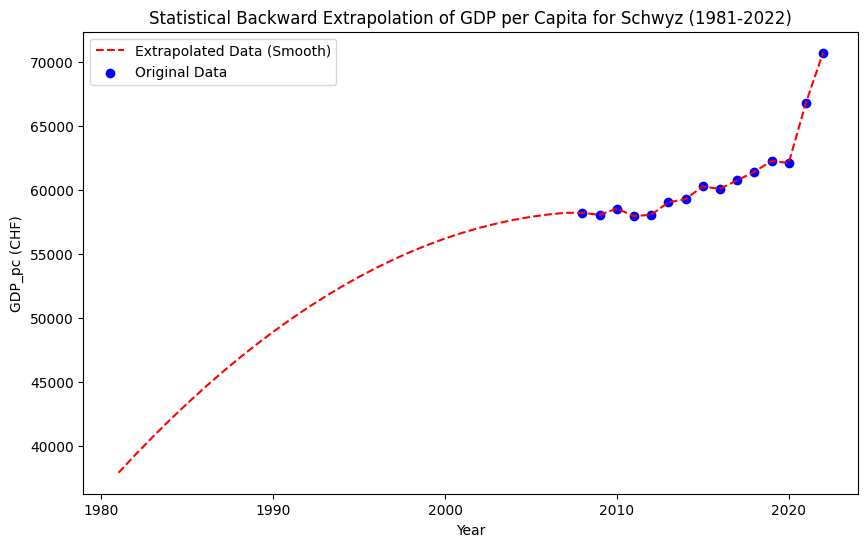

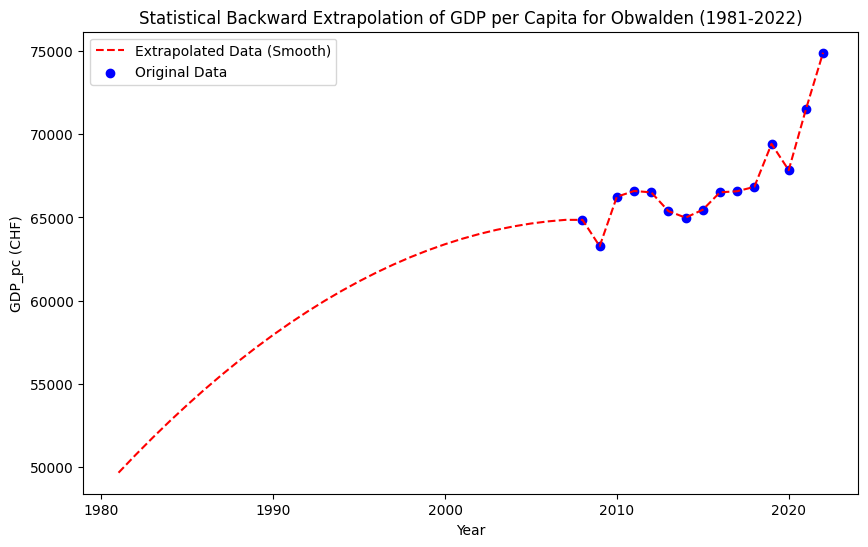

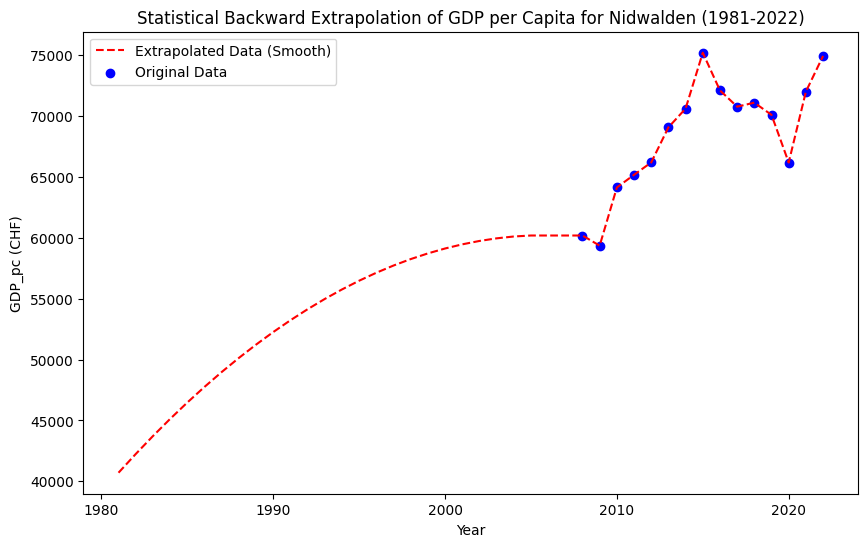

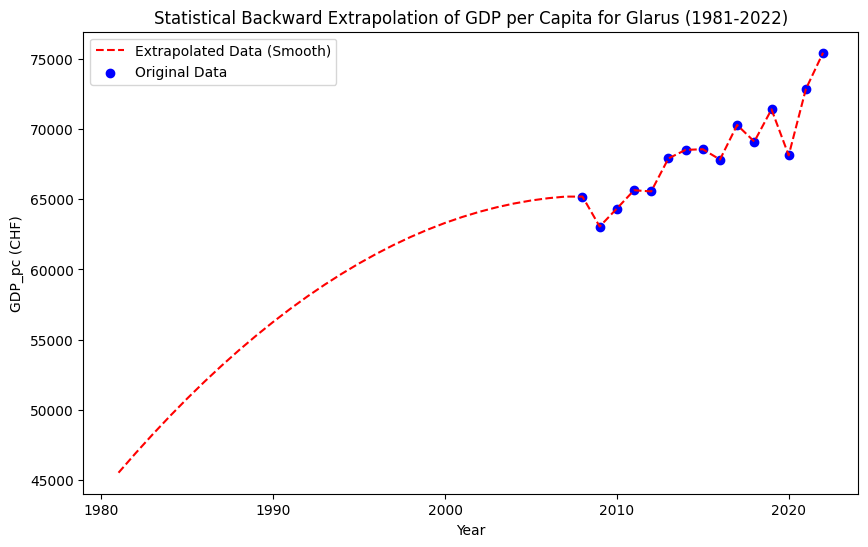

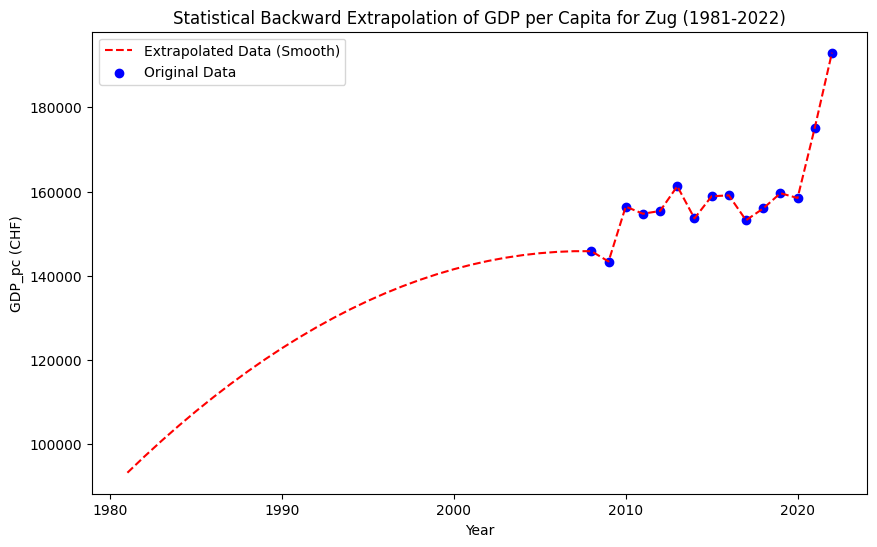

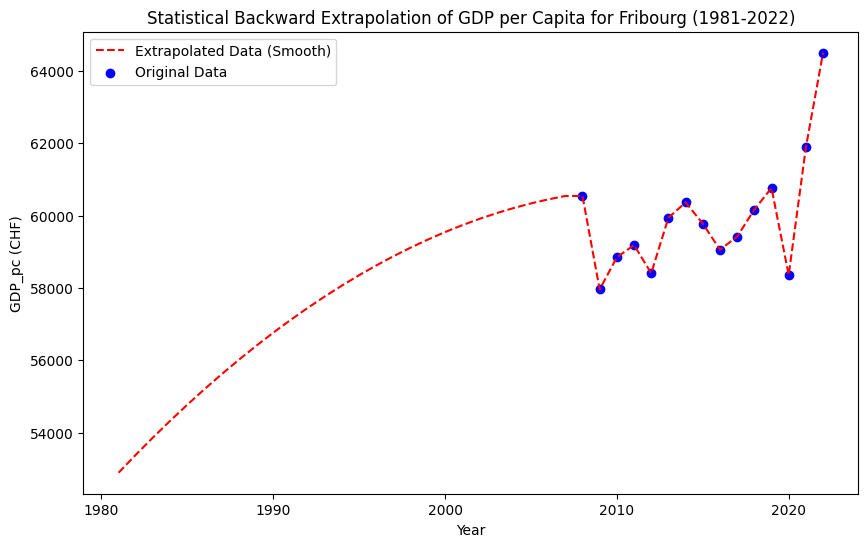

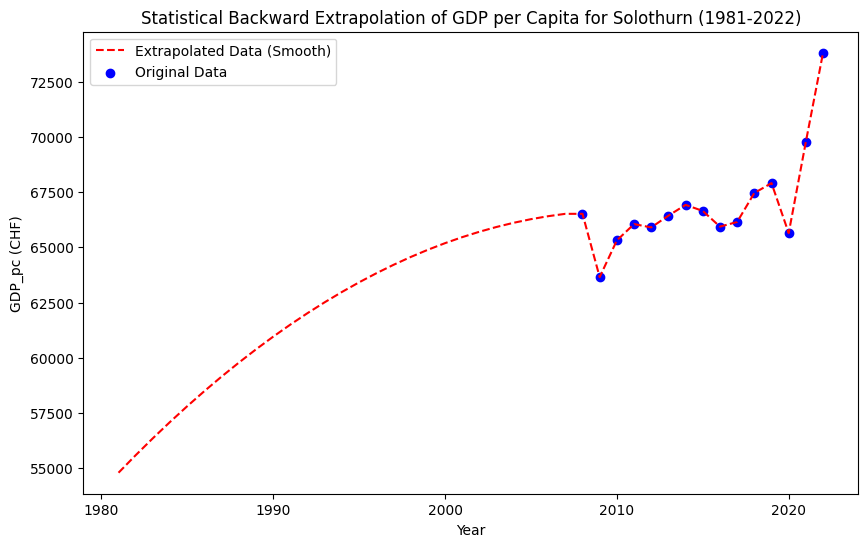

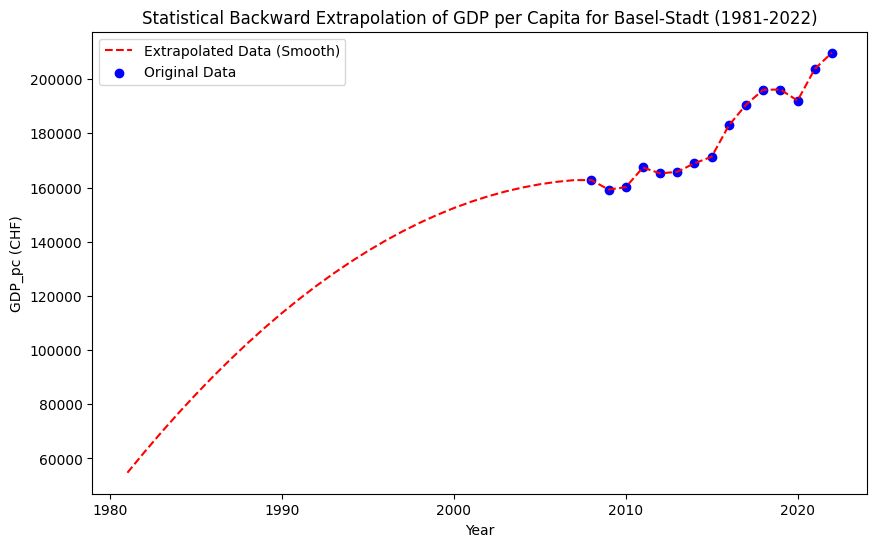

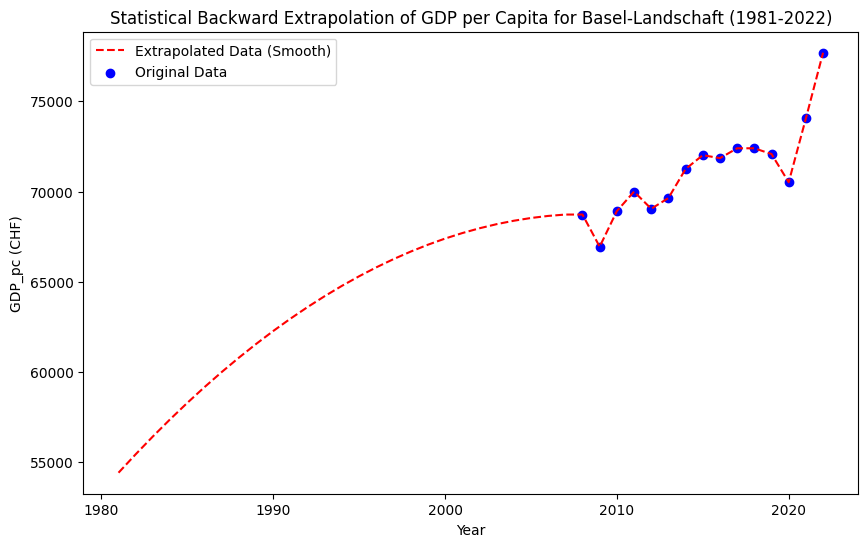

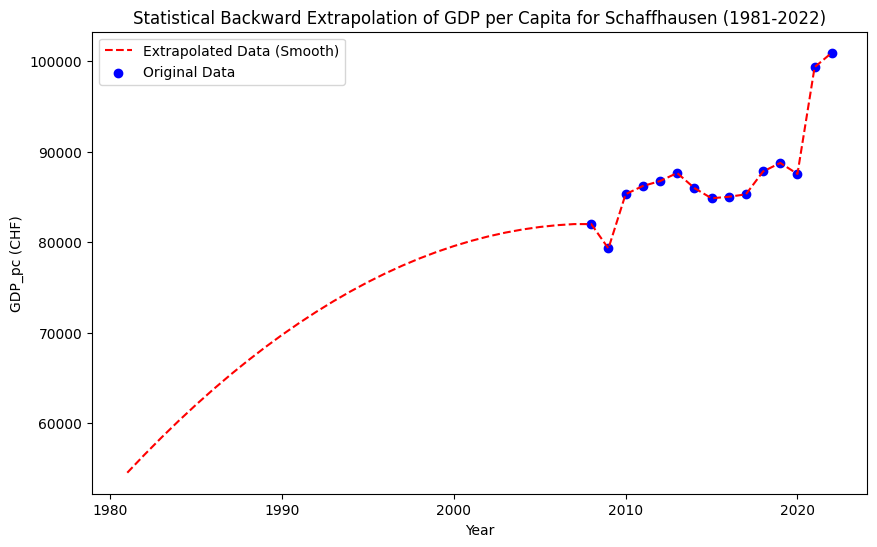

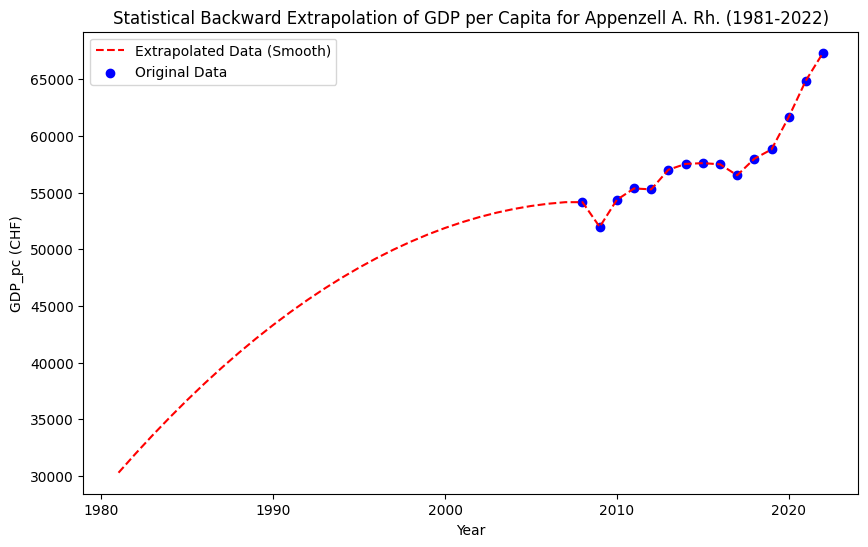

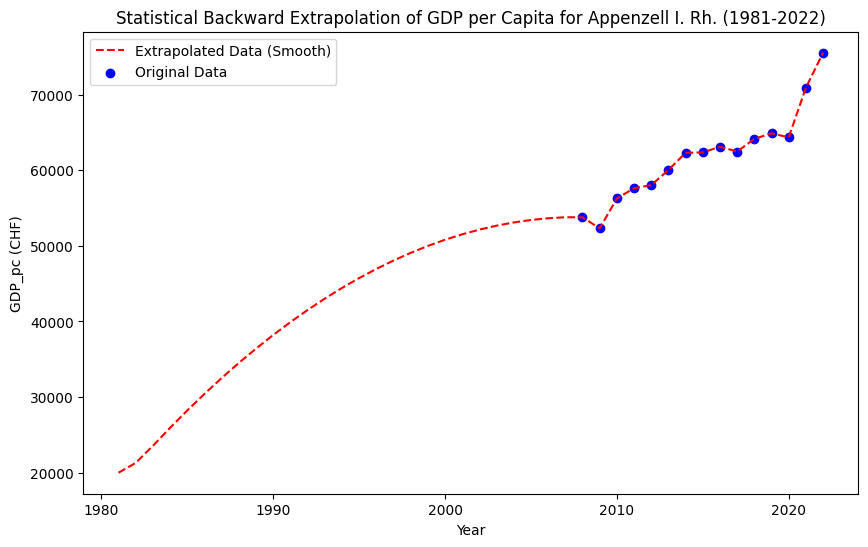

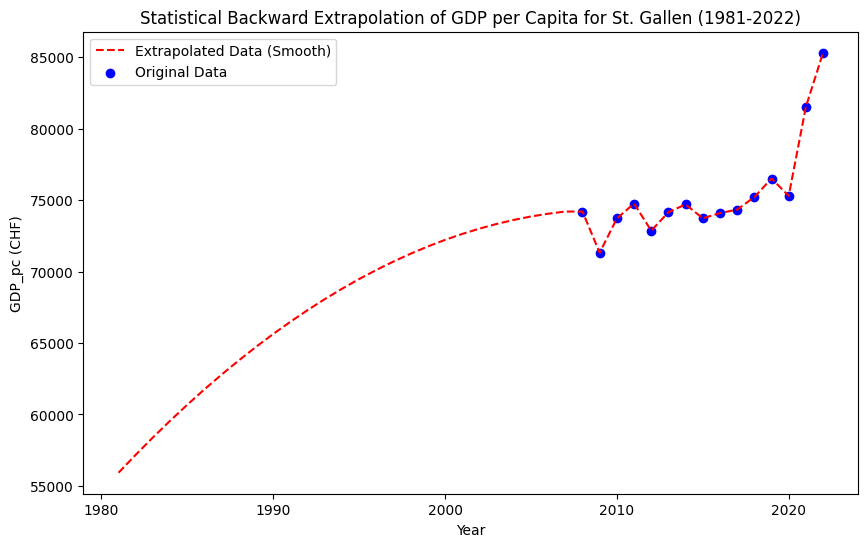

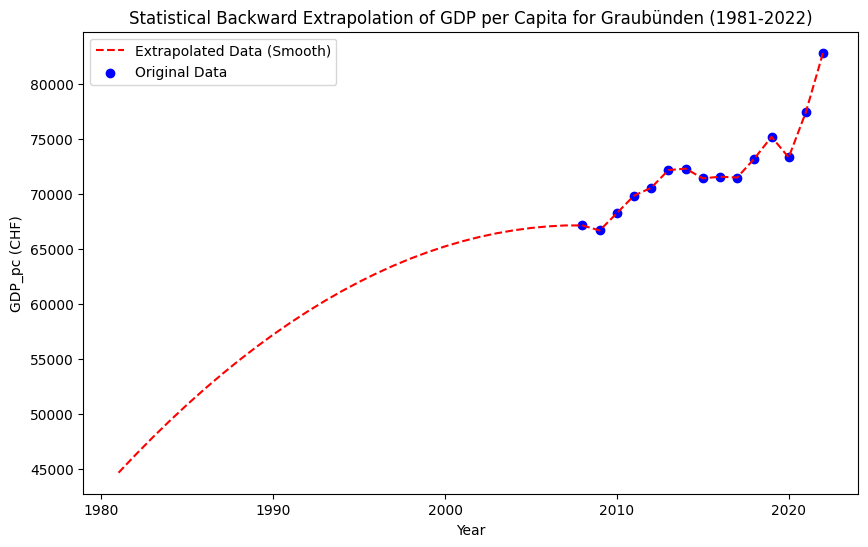

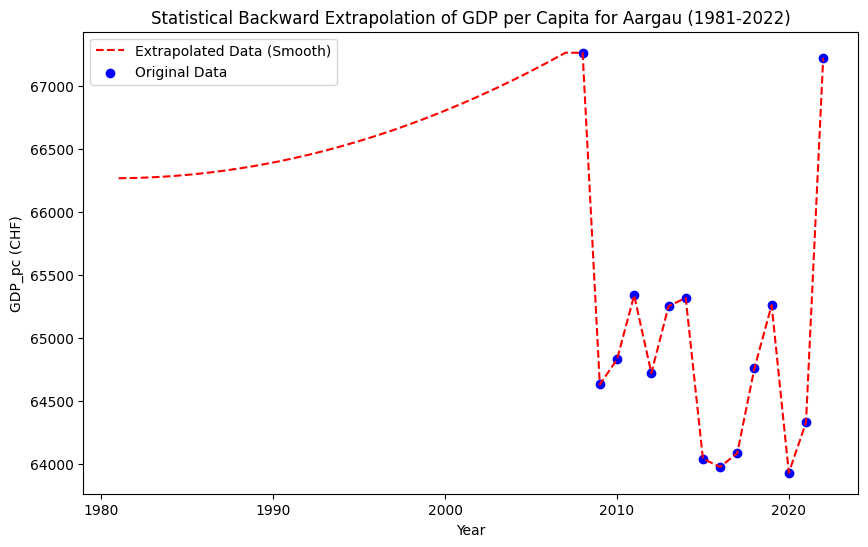

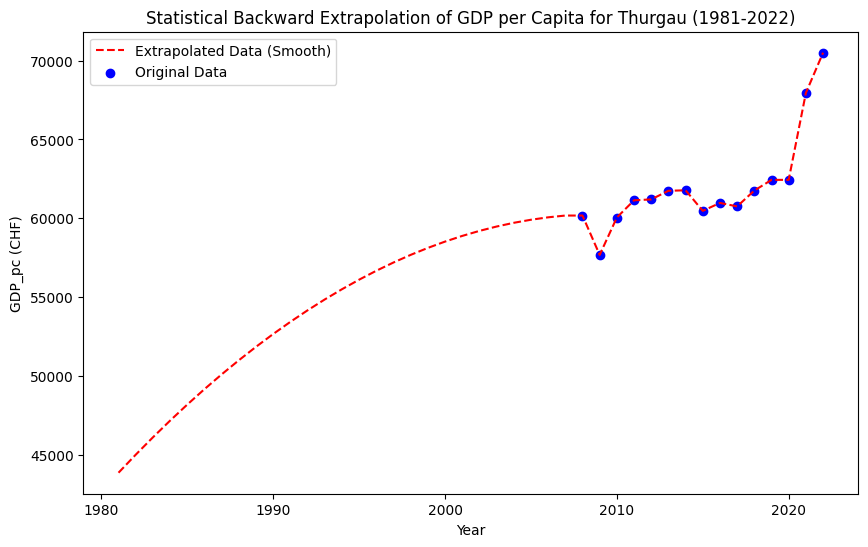

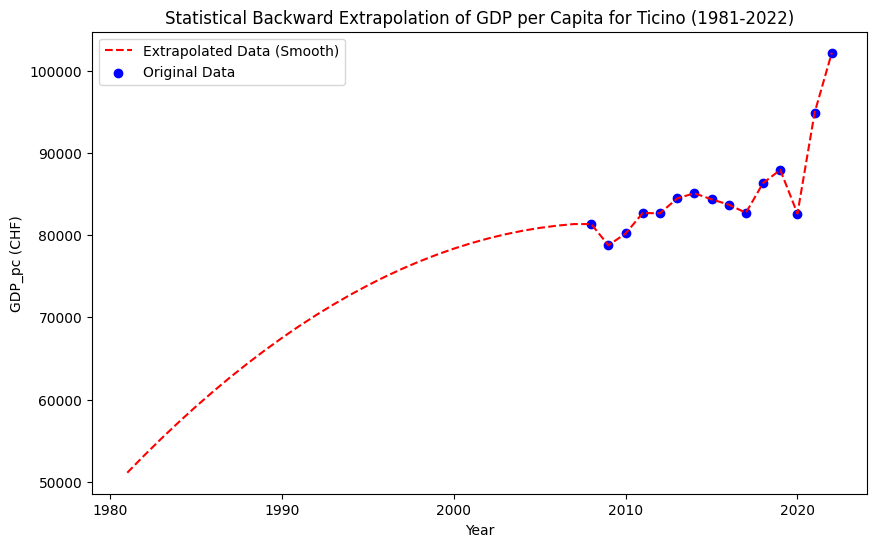

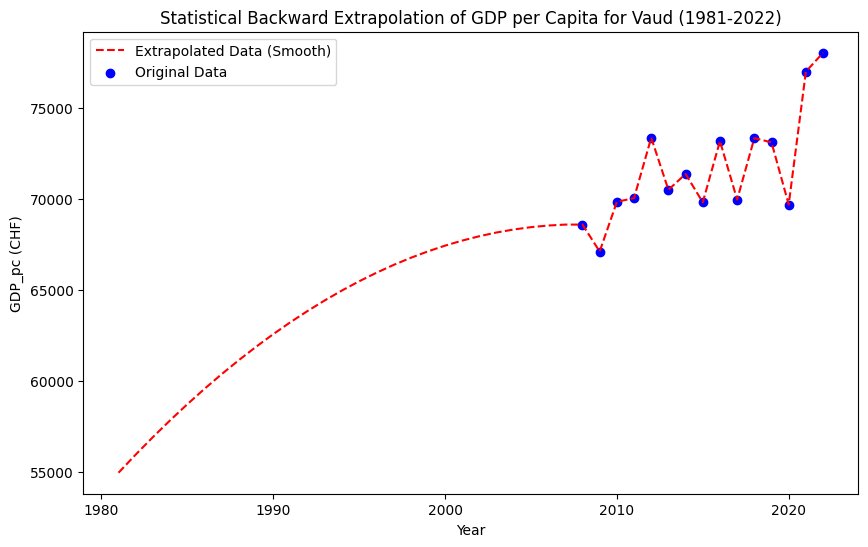

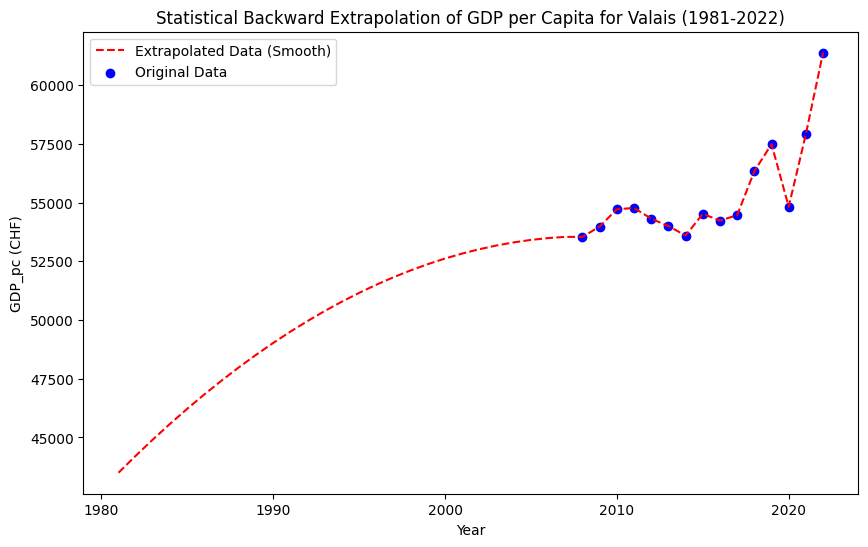

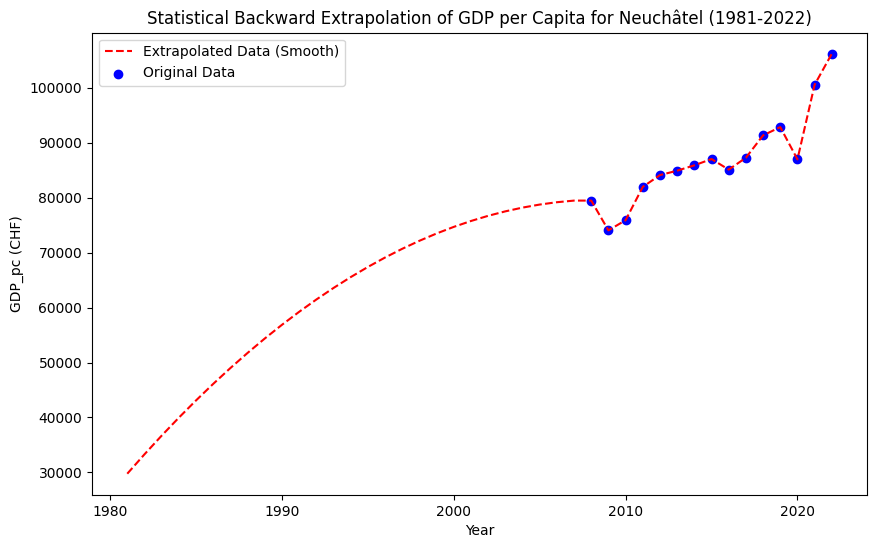

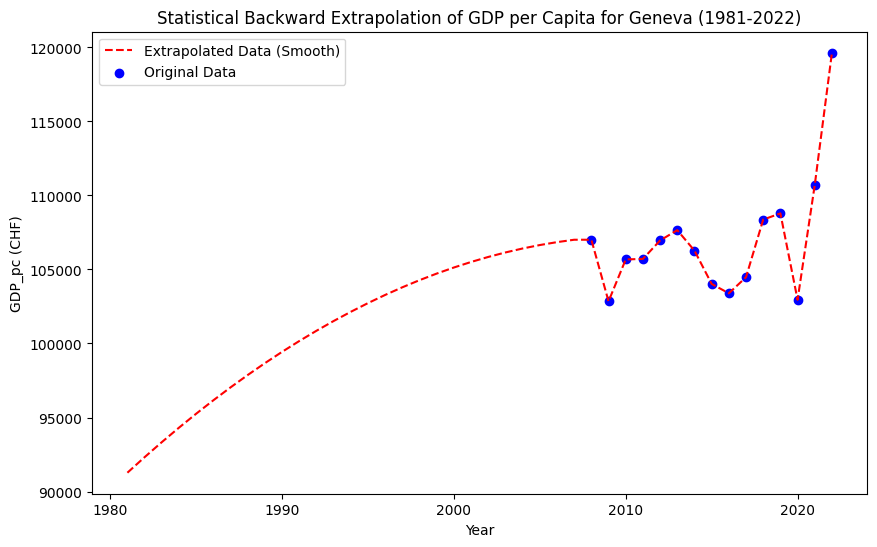

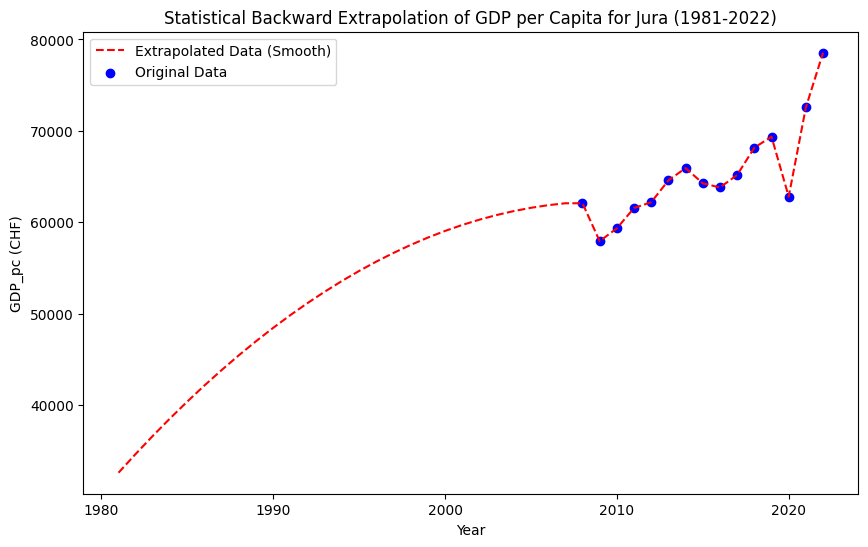

Extrapolated GDP per capita (1981-2022) for all cantons:
   Year  Canton        GDP_pc
0  1981  Zurich   99169.62723
1  1982  Zurich  99321.666868
2  1983  Zurich  99471.248313
3  1984  Zurich  99618.371565
4  1985  Zurich  99763.036624


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# List of unique cantons in the dataset
cantons = gdp_pc['Canton'].unique()

extrapolated_results = pd.DataFrame(columns=['Year', 'Canton', 'GDP_pc'])

# Adjustment factors for each canton (higher GDP cantons have larger adjustment factors)
canton_adjustment_factors = {
    'Zürich': 1.2, 'Basel-Stadt': 1.3, 'Zug': 1.4, 'Genève': 1.15,
    'Schwyz': 1.1, 'Aargau': 1.05, 'Vaud': 1.1, 'Bern': 0.95,
    'St. Gallen': 0.9, 'Ticino': 0.9, 'Fribourg': 0.85, 'Valais': 0.8,
    'Neuchâtel': 0.9, 'Thurgau': 0.9, 'Basel-Landschaft': 1.0, 'Luzern': 0.95,
    'Graubünden': 0.9, 'Schaffhausen': 0.95, 'Solothurn': 0.95, 'Glarus': 0.85,
    'Appenzell Innerrhoden': 0.75, 'Appenzell Ausserrhoden': 0.8, 'Nidwalden': 1.2,
    'Obwalden': 0.9, 'Uri': 0.8, 'Jura': 0.75
}

# Loop through each canton to fit a model and extrapolate
for canton in cantons:
    # Filter data for the specific canton
    canton_data = gdp_pc[gdp_pc['Canton'] == canton]

    X = canton_data['Year'].values.reshape(-1, 1)
    y = canton_data['GDP_pc'].values

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    # Extrapolate GDP from 1981 to 2007 only
    years_to_predict = np.arange(1981, 2008).reshape(-1, 1)
    predicted_gdp = linear_model.predict(years_to_predict)

    # Get the 2008 GDP to use as an upper bound
    starting_gdp_2008 = canton_data.loc[canton_data['Year'] == 2008, 'GDP_pc'].values[0]

    # Constraint 1: Ensure GDP is not below 20,000
    predicted_gdp = np.maximum(predicted_gdp, 20000)

    # Constraint 2: Ensure GDP does not exceed 2008 GDP for years before 2008
    predicted_gdp = np.minimum(predicted_gdp, starting_gdp_2008)

    if canton == 'Zürich':
        gdp_2015 = canton_data.loc[canton_data['Year'] == 2015, 'GDP_pc'].values[0] if 2015 in canton_data['Year'].values else starting_gdp_2008
        predicted_gdp = np.minimum(predicted_gdp, gdp_2015)  # Constraint 3: Ensure GDP does not exceed 2015 GDP for years before 2008

    # Smooth the transition from 1981 to 2008
    alpha = np.linspace(0, 1, len(np.arange(1981, 2008)))  # Gradual increase from 0 to 1
    smoothed_gdp = (1 - alpha) * predicted_gdp + alpha * starting_gdp_2008

    predicted_gdp = smoothed_gdp

    # Create a DataFrame for the extrapolated data from 1981 to 2022
    real_gdp_2008_onwards = canton_data.loc[canton_data['Year'] >= 2008]
    canton_extrapolated_gdp_pc = pd.DataFrame({
        'Year': np.arange(1981, 2008),
        'Canton': [canton] * len(np.arange(1981, 2008)),
        'GDP_pc': predicted_gdp
    })

    # Combine extrapolated GDP (1981-2007) with real GDP (2008-2022)
    combined_canton_gdp_pc = pd.concat([canton_extrapolated_gdp_pc, real_gdp_2008_onwards], ignore_index=True)
    combined_canton_gdp_pc = combined_canton_gdp_pc.sort_values(by='Year')

    extrapolated_results = pd.concat([extrapolated_results, combined_canton_gdp_pc], ignore_index=True)

    # Visualization of each canton's extrapolation
    plt.figure(figsize=(10, 6))
    plt.plot(combined_canton_gdp_pc['Year'], combined_canton_gdp_pc['GDP_pc'], label='Extrapolated Data (Smooth)', color='red', linestyle='dashed')
    plt.scatter(canton_data['Year'], canton_data['GDP_pc'], label='Original Data', color='blue')
    if canton == 'Zürich':
        plt.axhline(y=gdp_2015, color='green', linestyle='--', label='2015 GDP Cap')
    plt.xlabel('Year')
    plt.ylabel('GDP_pc (CHF)')
    plt.title(f'Statistical Backward Extrapolation of GDP per Capita for {canton} (1981-2022)')
    plt.legend()
    plt.show()

print("Extrapolated GDP per capita (1981-2022) for all cantons:")
print(extrapolated_results.head())


Above code adapted from Open AI, 2024.

Since this extrapolation was relatively inaccurate when looking at the average (historical) GDP per capita value, we decided to perform the extrapolation again but this time use historical GDP per capita values for the entire Switzerland to the model. Using existing data, we calculate an adjustment factor for each canton and apply this to the Swiss GDP per capita in order to extrapolate for individual cantons.

**Further Reasoning Behind Extrapolation**

Each canton is assigned an adjustment factor based on whether it is a wealthier or less econonmically active canton. A minimum bound of CHF 20,000 GDP per capita is used to prevent unrealistically low predictions, and a upper bound to prevent overestimations. In addition, the average canton GDP for a given year is adjusted to align with national GDP targets for that year (from historical data). The extrapolated GDP values for each canton for specific years are scaled proportionally to ensure the national average matches the target GDP per capita. We sourced this data online and converted all historical GDP amounts that we could only find in USD to current CHF.

In [ ]:
# USD Swiss GDP per capita amounts for specific years (to serve as accurate references for extrapolation accuracy sourced from FRED)
usd_amounts = {
    1981: 17700,
    1982: 18000,
    1983:17900,
    1984: 16900,
    1985: 17100,
    1986: 24500,
    1987: 30400,
    1988: 32700,
    1989: 31300,
    1990: 39600,
    1991: 39500,
    1992: 40700,
    1993: 39200,
    1994: 43100,
    1995: 50100,
    1996: 48100,
    1997: 41600,
    1998: 42700,
    1999: 41700,
    2000: 38900,
    2001: 38900,
    2002: 42500,
    2003: 49300,
    2004: 54700,
    2005: 56200,
    2006: 59000,
    2007: 65000,
}

# Current USD to CHF exchange rate
current_exchange_rate = 0.8787  # As of December 9, 2024

# Convert USD to CHF using the current exchange rate
chf_amounts = {year: amount * current_exchange_rate for year, amount in usd_amounts.items()}

for year in sorted(chf_amounts):
    print(f"{year}: USD {usd_amounts[year]:,.2f} = CHF {chf_amounts[year]:,.2f}")


1981: USD 17,700.00 = CHF 15,552.99
1982: USD 18,000.00 = CHF 15,816.60
1983: USD 17,900.00 = CHF 15,728.73
1984: USD 16,900.00 = CHF 14,850.03
1985: USD 17,100.00 = CHF 15,025.77
1986: USD 24,500.00 = CHF 21,528.15
1987: USD 30,400.00 = CHF 26,712.48
1988: USD 32,700.00 = CHF 28,733.49
1989: USD 31,300.00 = CHF 27,503.31
1990: USD 39,600.00 = CHF 34,796.52
1991: USD 39,500.00 = CHF 34,708.65
1992: USD 40,700.00 = CHF 35,763.09
1993: USD 39,200.00 = CHF 34,445.04
1994: USD 43,100.00 = CHF 37,871.97
1995: USD 50,100.00 = CHF 44,022.87
1996: USD 48,100.00 = CHF 42,265.47
1997: USD 41,600.00 = CHF 36,553.92
1998: USD 42,700.00 = CHF 37,520.49
1999: USD 41,700.00 = CHF 36,641.79
2000: USD 38,900.00 = CHF 34,181.43
2001: USD 38,900.00 = CHF 34,181.43
2002: USD 42,500.00 = CHF 37,344.75
2003: USD 49,300.00 = CHF 43,319.91
2004: USD 54,700.00 = CHF 48,064.89
2005: USD 56,200.00 = CHF 49,382.94
2006: USD 59,000.00 = CHF 51,843.30
2007: USD 65,000.00 = CHF 57,115.50


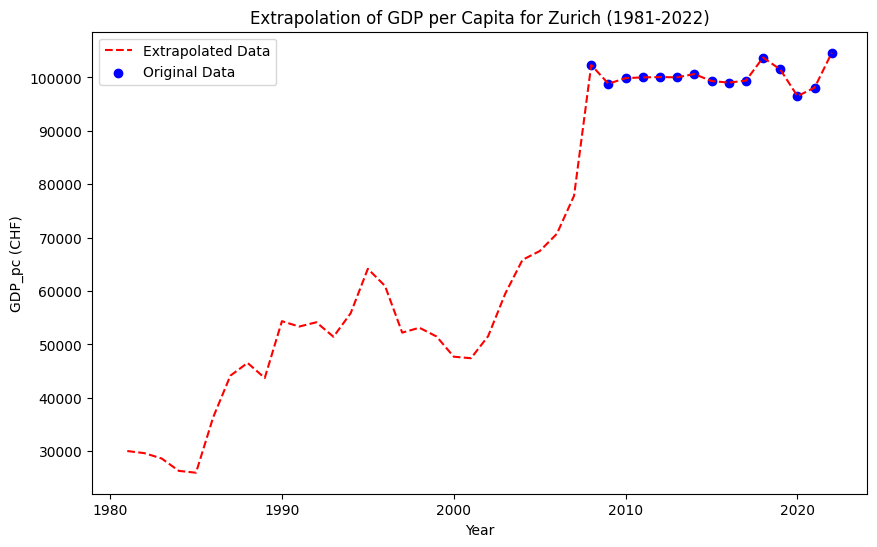

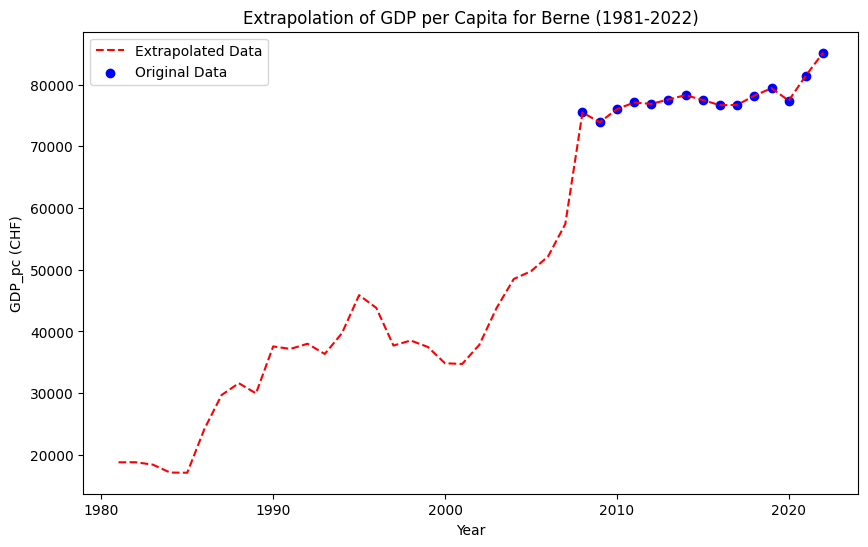

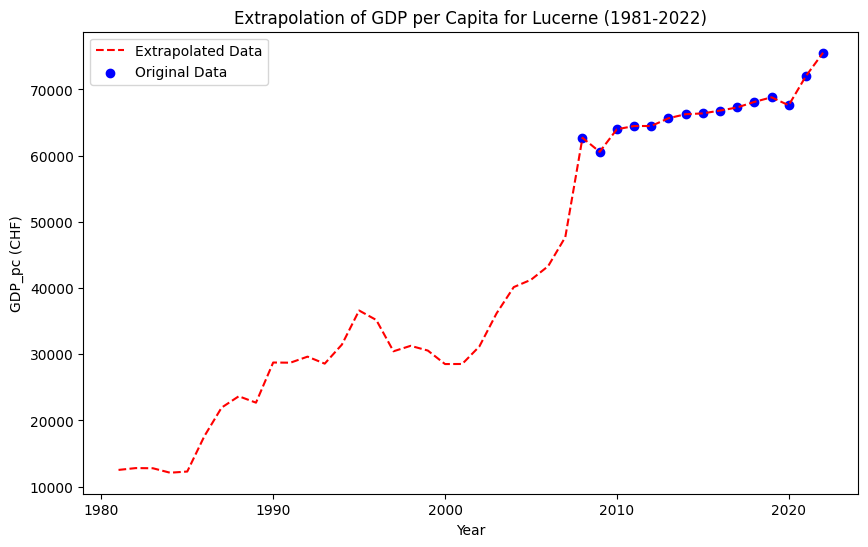

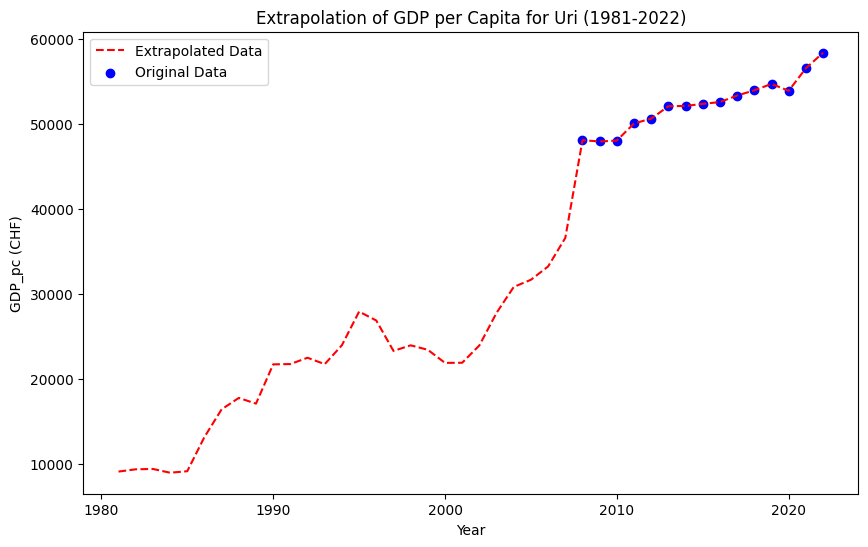

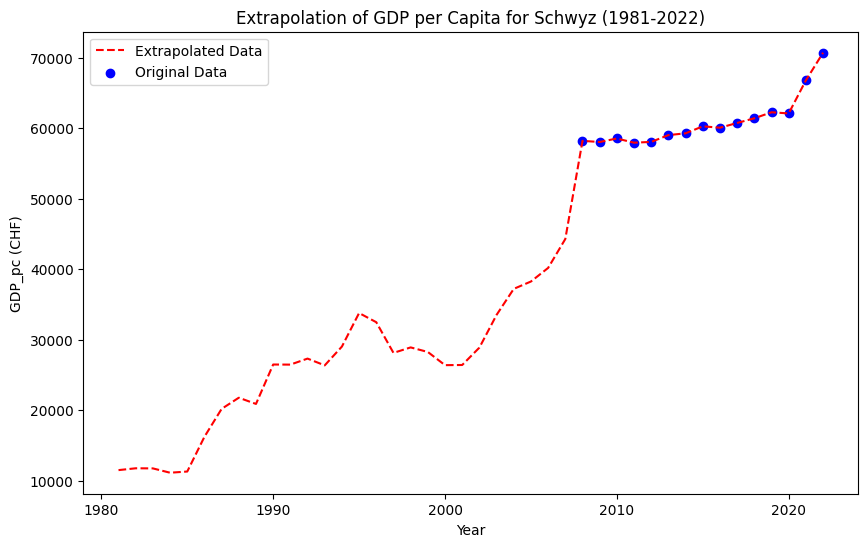

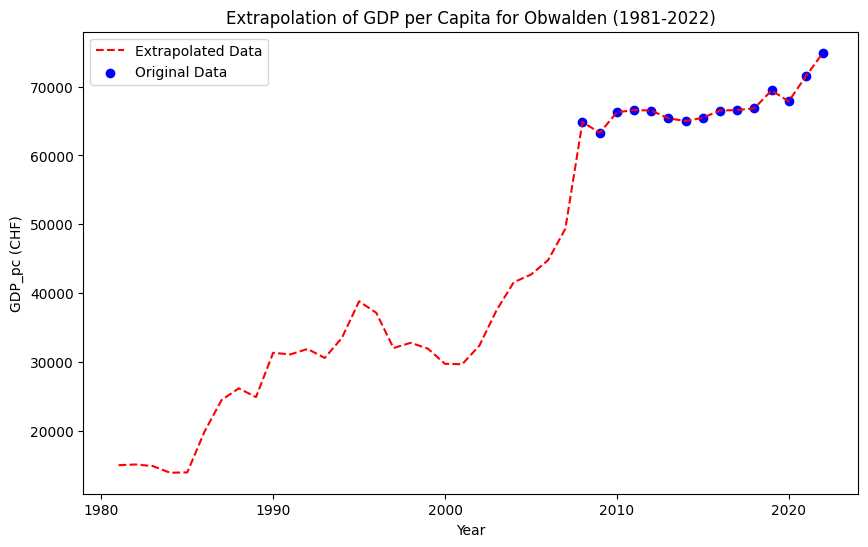

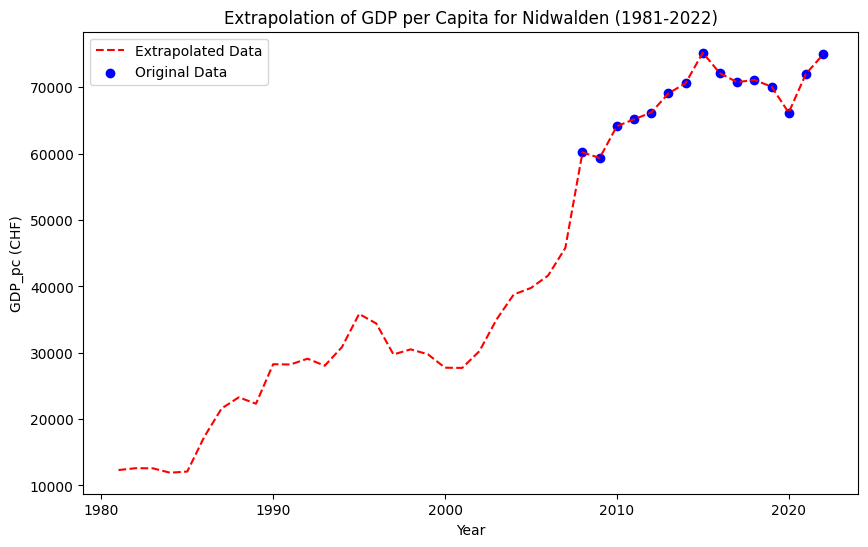

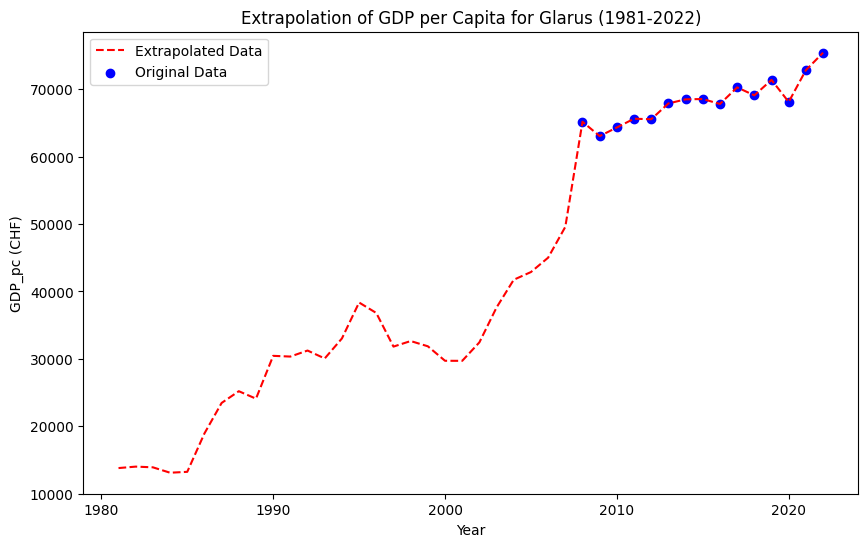

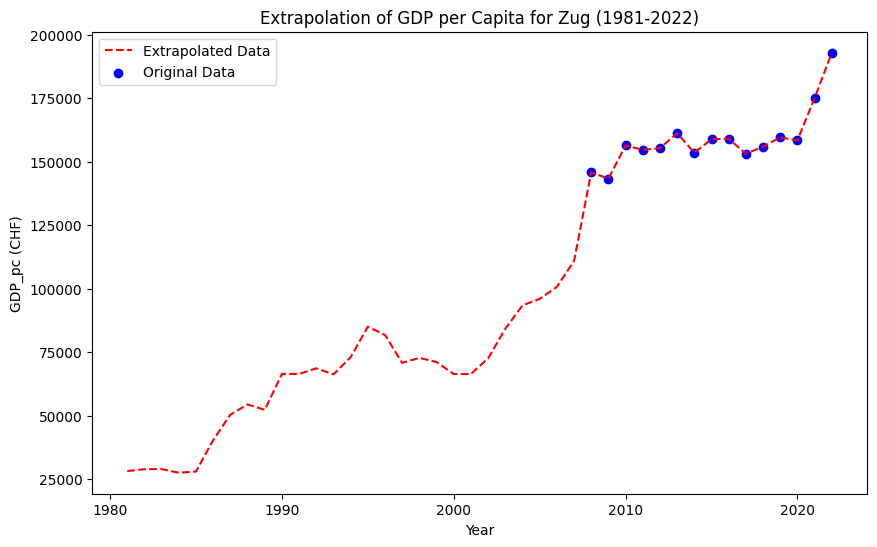

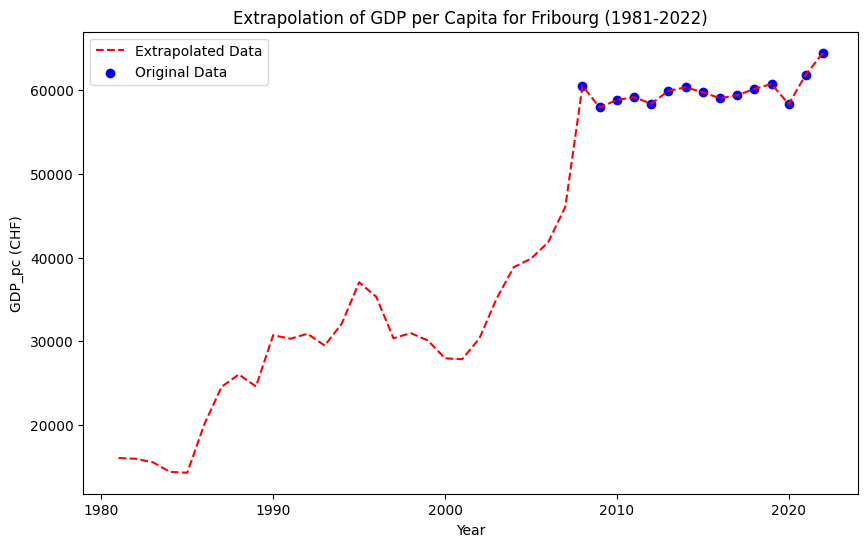

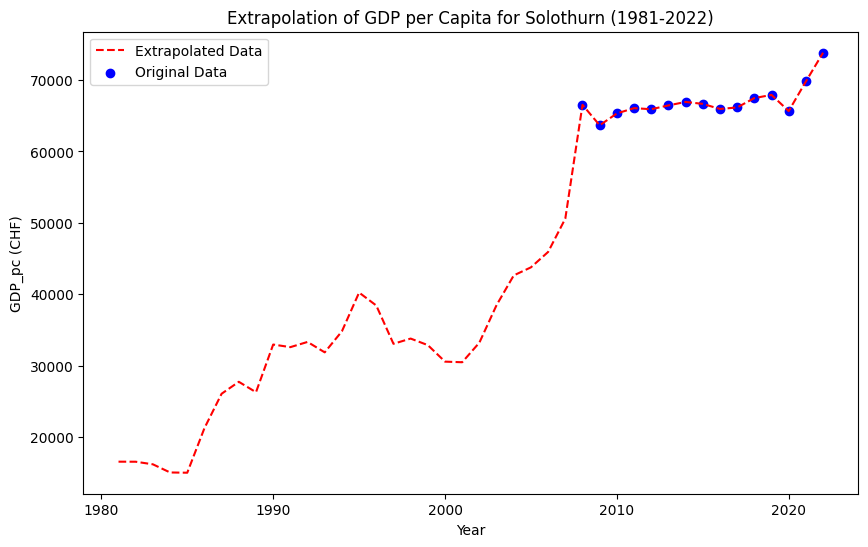

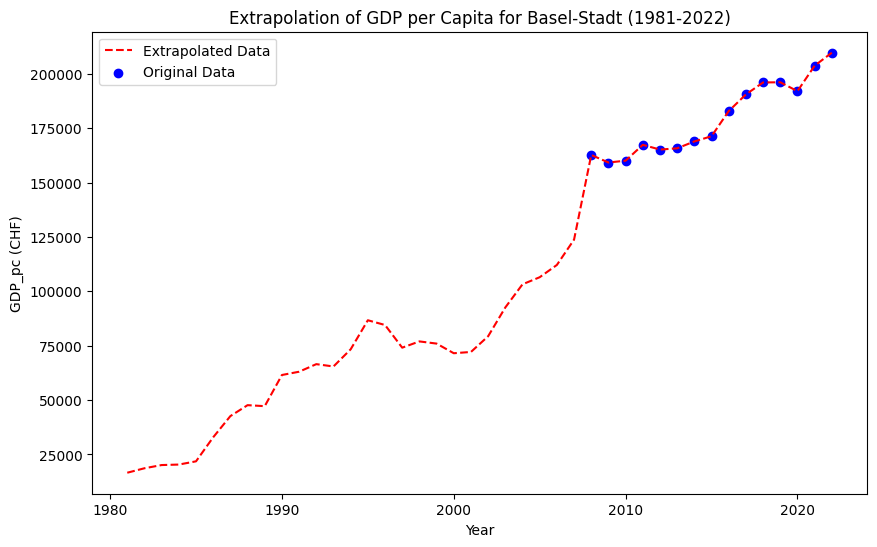

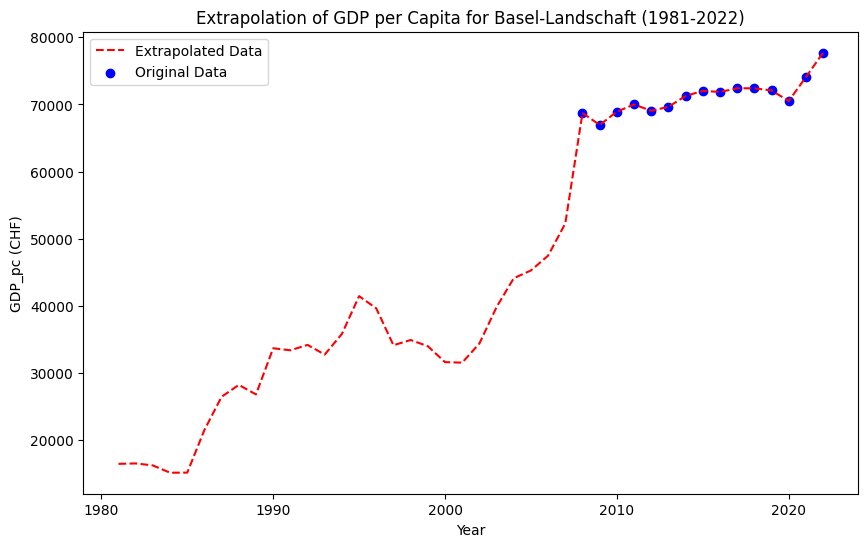

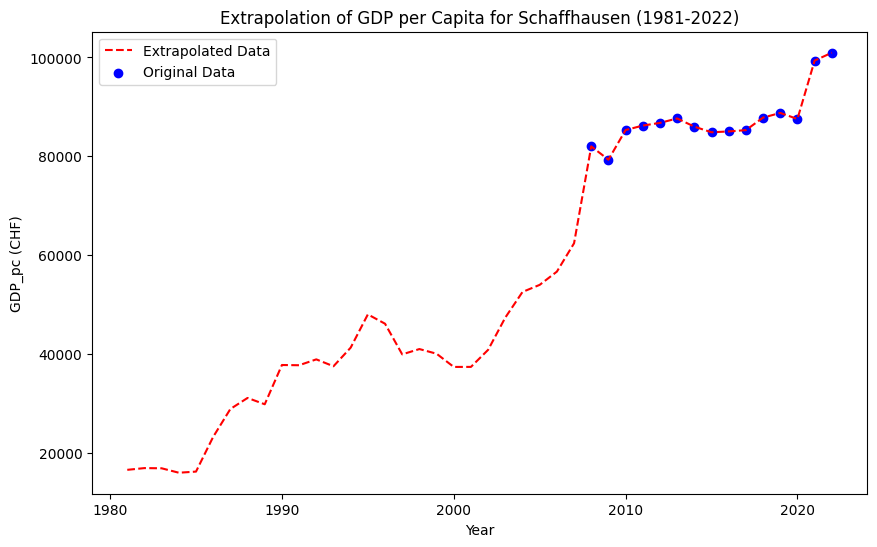

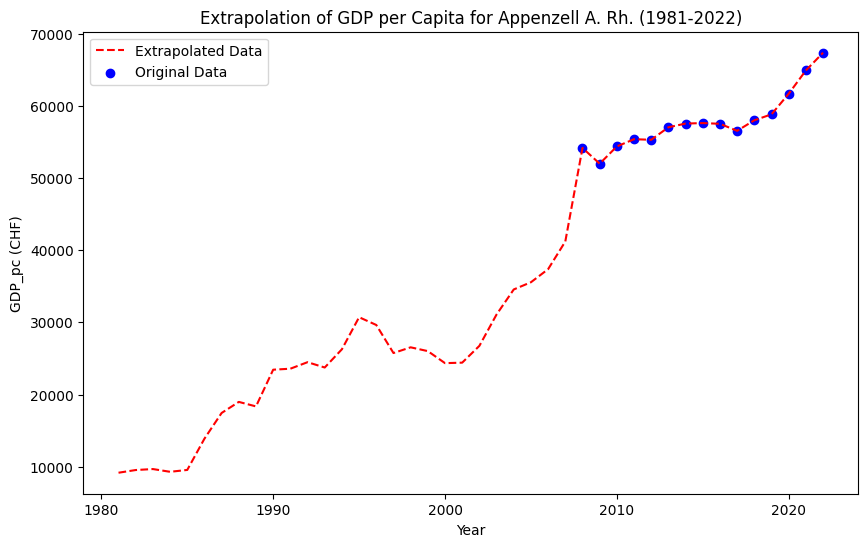

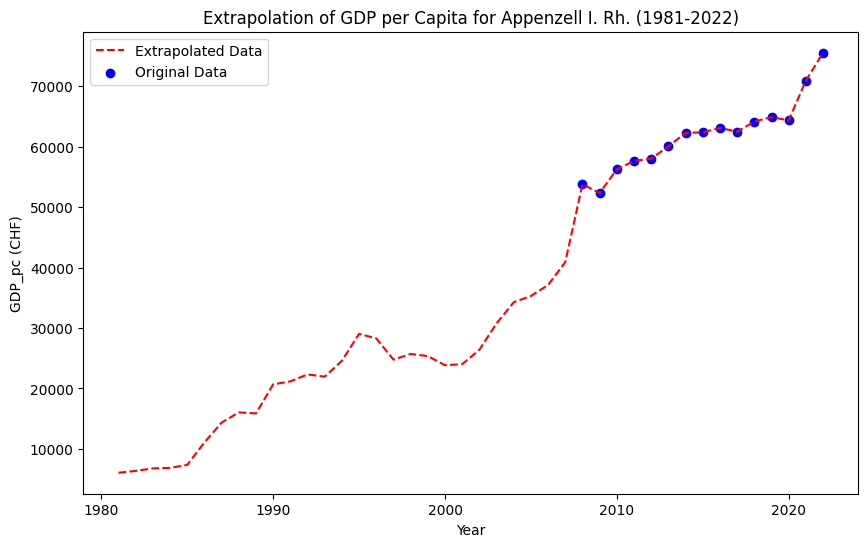

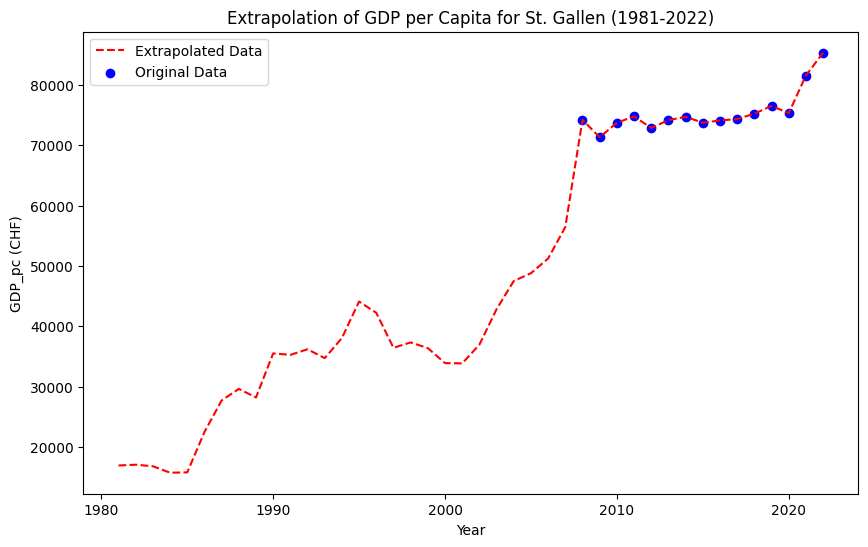

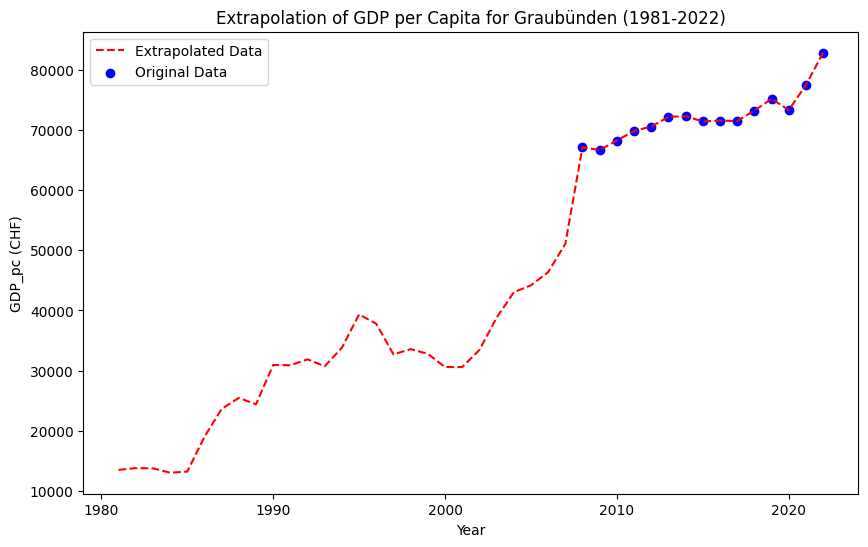

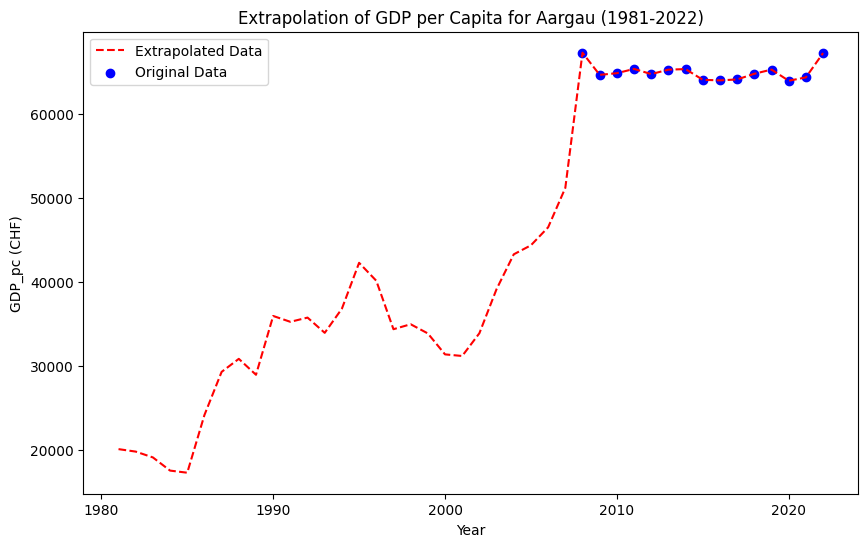

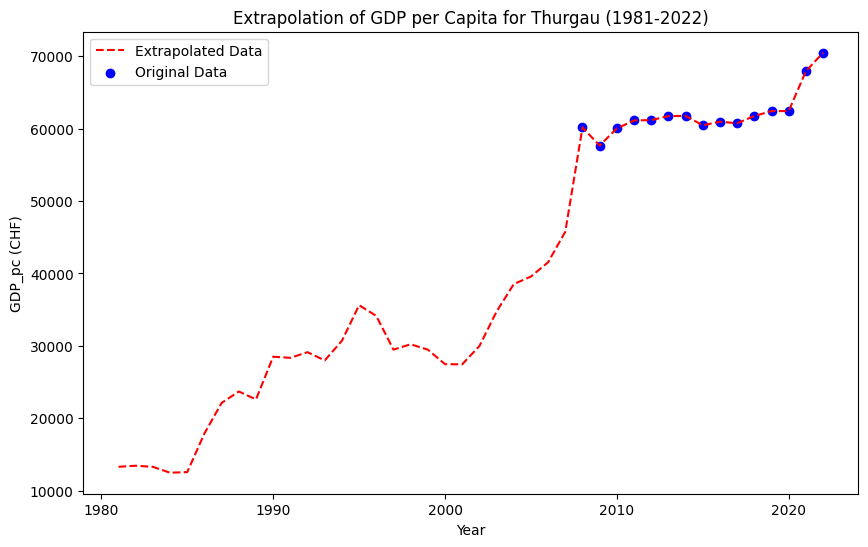

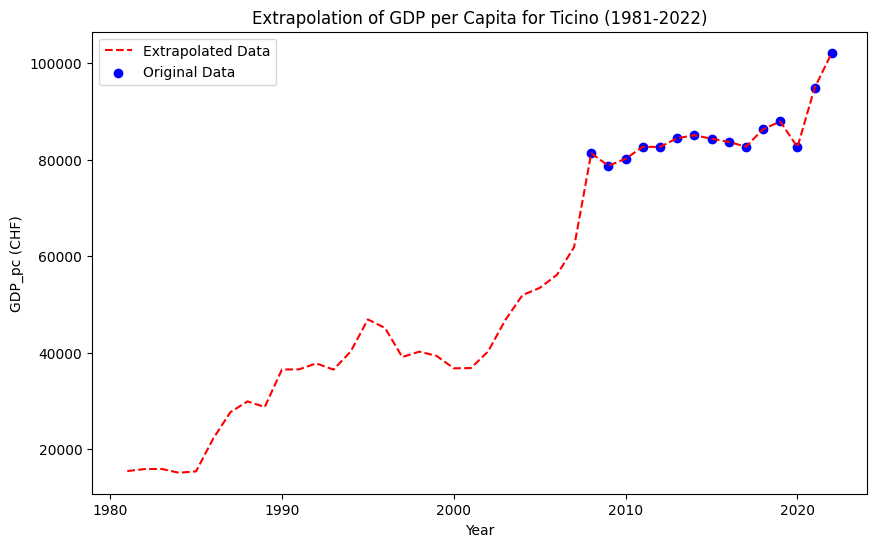

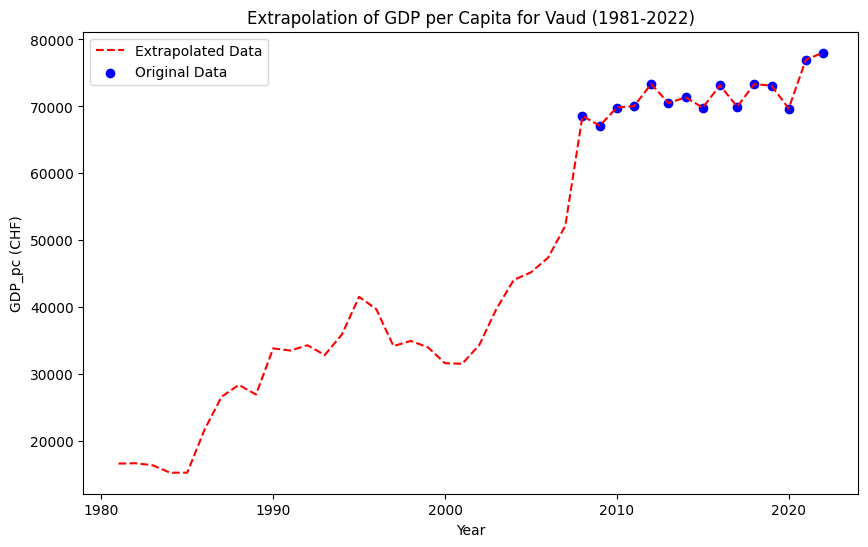

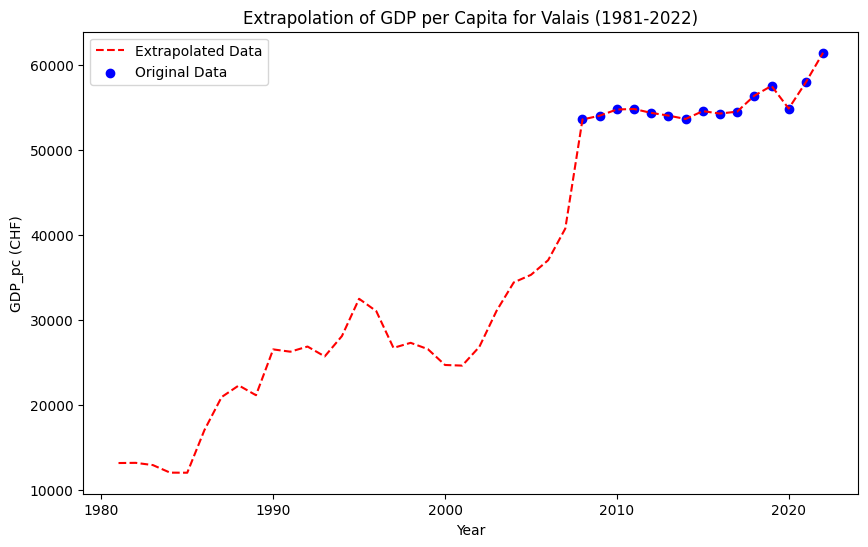

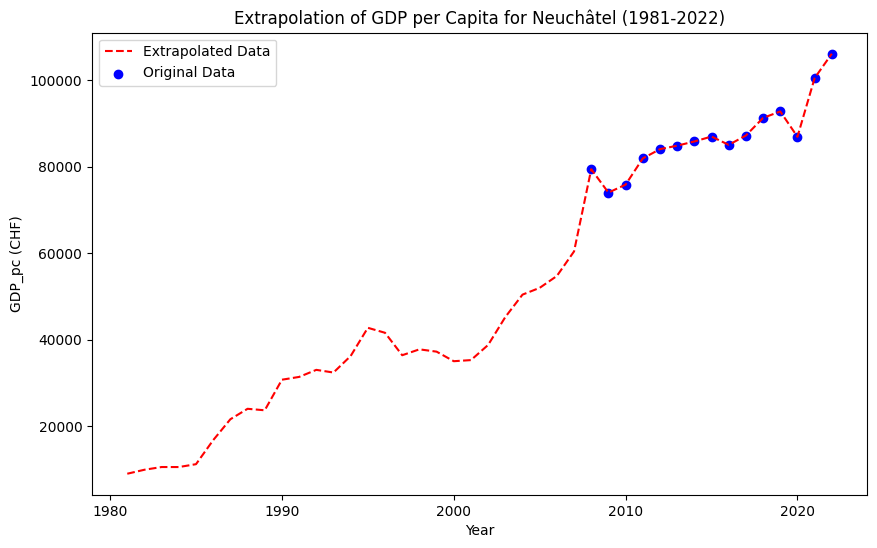

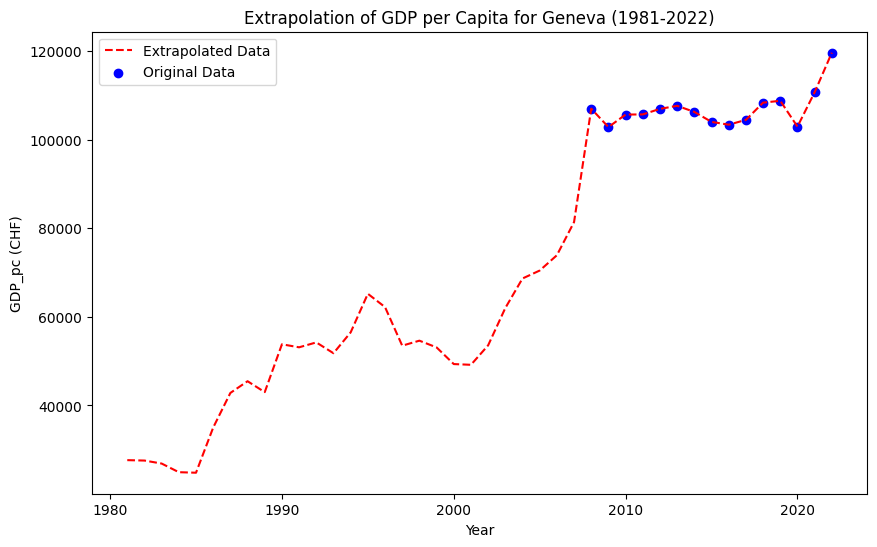

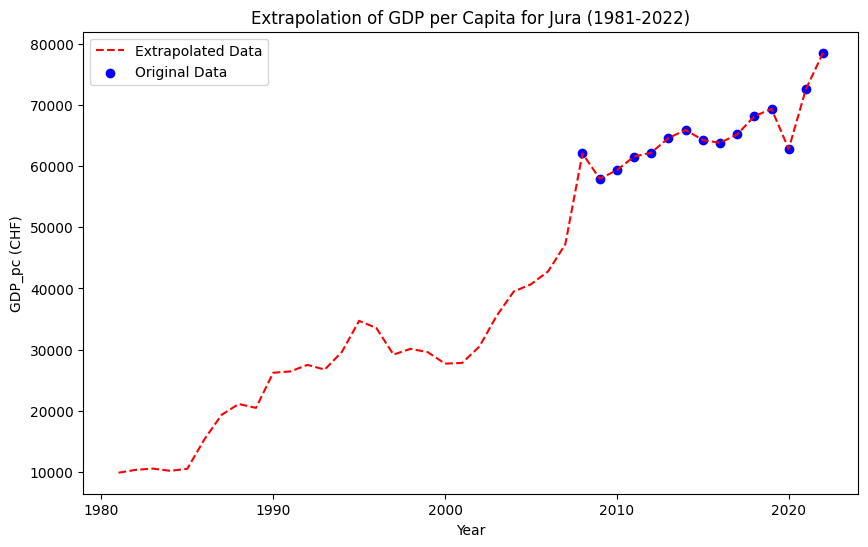

Extrapolated GDP per capita (1981-2022) for all cantons:
   Year  Canton        GDP_pc
0  1981  Zurich  30038.706966
1  1982  Zurich  29643.829356
2  1983  Zurich  28645.195933
3  1984  Zurich  26327.454144
4  1985  Zurich  25980.051173


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cantons = gdp_pc['Canton'].unique()

extrapolated_results = pd.DataFrame(columns=['Year', 'Canton', 'GDP_pc'])

# Adjustment factors for each canton (higher GDP cantons have larger adjustment factors)
canton_adjustment_factors = {
    'Zürich': 1.2, 'Basel-Stadt': 1.3, 'Zug': 1.4, 'Genève': 1.15,
    'Schwyz': 1.1, 'Aargau': 1.05, 'Vaud': 1.1, 'Bern': 0.95,
    'St. Gallen': 0.9, 'Ticino': 0.9, 'Fribourg': 0.85, 'Valais': 0.8,
    'Neuchâtel': 0.9, 'Thurgau': 0.9, 'Basel-Landschaft': 1.0, 'Luzern': 0.95,
    'Graubünden': 0.9, 'Schaffhausen': 0.95, 'Solothurn': 0.95, 'Glarus': 0.85,
    'Appenzell Innerrhoden': 0.75, 'Appenzell Ausserrhoden': 0.8, 'Nidwalden': 1.2,
    'Obwalden': 0.9, 'Uri': 0.8, 'Jura': 0.75
}

# National GDP per capita targets for each year (for greater extrapolatoin accuracy)
national_gdp_targets = {
    1981: 15552.99, 1982: 15816.60, 1983: 15728.73, 1984: 14850.03, 1985: 15025.77,
    1986: 21528.15, 1987: 26712.48, 1988: 28733.49, 1989: 27503.31, 1990: 34796.52,
    1991: 34708.65, 1992: 35763.09, 1993: 34445.04, 1994: 37871.97, 1995: 44022.87,
    1996: 42265.47, 1997: 36553.92, 1998: 37520.49, 1999: 36641.79, 2000: 34181.43,
    2001: 34181.43, 2002: 37344.75, 2003: 43319.91, 2004: 48064.89, 2005: 49382.94,
    2006: 51843.30, 2007: 57115.50
}

# Loop through each canton to fit a model and extrapolate
for canton in cantons:

    canton_data = gdp_pc[gdp_pc['Canton'] == canton]

    X = canton_data['Year'].values.reshape(-1, 1)
    y = canton_data['GDP_pc'].values

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    # extrapolate GDP from 1981 to 2007
    years_to_predict = np.arange(1981, 2008).reshape(-1, 1)
    predicted_gdp = linear_model.predict(years_to_predict)

    # Apply constraints
    starting_gdp_2008 = canton_data.loc[canton_data['Year'] == 2008, 'GDP_pc'].values[0]
    predicted_gdp = np.maximum(predicted_gdp, 20000)
    predicted_gdp = np.minimum(predicted_gdp, starting_gdp_2008)

    # Smooth transition from 1981 to 2008
    alpha = np.linspace(0, 1, len(np.arange(1981, 2008)))
    smoothed_gdp = (1 - alpha) * predicted_gdp + alpha * starting_gdp_2008
    predicted_gdp = smoothed_gdp

    canton_extrapolated_gdp_pc = pd.DataFrame({
        'Year': np.arange(1981, 2008),
        'Canton': [canton] * len(np.arange(1981, 2008)),
        'GDP_pc': predicted_gdp
    })

    combined_canton_gdp_pc = pd.concat([canton_extrapolated_gdp_pc, canton_data[canton_data['Year'] >= 2008]], ignore_index=True)
    extrapolated_results = pd.concat([extrapolated_results, combined_canton_gdp_pc], ignore_index=True)

# Apply national constraints for each year
for year, target in national_gdp_targets.items():
    canton_gdp_year = extrapolated_results[extrapolated_results['Year'] == year]
    current_average = canton_gdp_year['GDP_pc'].mean()
    adjustment_factor = target / current_average
    extrapolated_results.loc[extrapolated_results['Year'] == year, 'GDP_pc'] *= adjustment_factor

# Plotting the results
for canton in cantons:
    canton_data = extrapolated_results[extrapolated_results['Canton'] == canton]
    plt.figure(figsize=(10, 6))
    plt.plot(canton_data['Year'], canton_data['GDP_pc'], label='Extrapolated Data', color='red', linestyle='dashed')
    plt.scatter(gdp_pc[gdp_pc['Canton'] == canton]['Year'], gdp_pc[gdp_pc['Canton'] == canton]['GDP_pc'], label='Original Data', color='blue')
    plt.xlabel('Year')
    plt.ylabel('GDP_pc (CHF)')
    plt.title(f'Extrapolation of GDP per Capita for {canton} (1981-2022)')
    plt.legend()
    plt.show()

print("Extrapolated GDP per capita (1981-2022) for all cantons:")
print(extrapolated_results.head())

Above code adapted from Open AI, 2024.

The above data was saved as a csv file (extrapolated_gdp_per_capita.csv). Therefore, below is the final data used for the feature GDP per capita:

In [ ]:
gdp_pc = pd.read_csv(path + "extrapolated_gdp_per_capita.csv")
gdp_pc.head()

Year  Canton        GDP_pc
0  1981  Zurich  30038.706966
1  1982  Zurich  29643.829356
2  1983  Zurich  28645.195933
3  1984  Zurich  26327.454144
4  1985  Zurich  25980.051173

In [ ]:
gdp_pc.tail()

Year Canton       GDP_pc
1087  2018   Jura  68160.71378
1088  2019   Jura  69362.62763
1089  2020   Jura  62809.98072
1090  2021   Jura  72578.02959
1091  2022   Jura  78546.37592

**Unemployment Data**

In the unemployment data we only want the data where ERWL (Considered population with respect to unemployed persons) is equal to Unemployed (1), ERWP (Considered population with respect to economically active persons) is equal to total, POP1564 (Considered population with respect to age) is equal to 1(Resident permanent population of 15 to 64 years), and the UNIT_MEA is pers in %. This allows us to get the unemployment rate for each canton. We then remove the data for the entire country (CH) and replace the name of the cantons to match the rest of the data.

In [ ]:
unemployment = pd.read_csv(path + "unemployment.csv")

# Filter for unemployment data as a percentage
unemployment_rate = unemployment[(unemployment['ERWL'] == '1') & (unemployment['ERWP'] == 'Total') & (unemployment['POP1564'] == '1') & (unemployment['UNIT_MEA'] == 'pers in %')]
unemployment_rate = unemployment_rate[['TIME_PERIOD', 'GEO', 'OBS_VALUE']]

# Filter out Switzerland from the datase
unemployment_rate = unemployment_rate[unemployment_rate['GEO'] != 'CH']

location_mapping = {
    'CH011': 'Vaud',
    'CH012': 'Valais / Wallis',
    'CH013': 'Genève',
    'CH021': 'Bern / Berne',
    'CH022': 'Fribourg / Freiburg',
    'CH023': 'Solothurn',
    'CH024': 'Neuchâtel',
    'CH025': 'Jura',
    'CH031': 'Basel-Stadt',
    'CH032': 'Basel-Landschaft',
    'CH033': 'Aargau',
    'CH040': 'Zürich',
    'CH051': 'Glarus',
    'CH052': 'Schaffhausen',
    'CH053': 'Appenzell Ausserrhoden',
    'CH054': 'Appenzell Innerrhoden',
    'CH055': 'St. Gallen',
    'CH056': 'Graubünden / Grigioni / Grischun',
    'CH057': 'Thurgau',
    'CH061': 'Luzern',
    'CH062': 'Uri',
    'CH063': 'Schwyz',
    'CH064': 'Obwalden',
    'CH065': 'Nidwalden',
    'CH066': 'Zug',
    'CH070': 'Ticino'
}

unemployment_rate['GEO'] = unemployment_rate['GEO'].replace(location_mapping)

unemployment_rate = unemployment_rate.rename(columns={'TIME_PERIOD': 'Year', 'GEO': 'Canton', 'OBS_VALUE': 'unemployment'})
unemployment_rate = unemployment_rate.drop_duplicates().dropna()
unemployment_rate.head()

Year        Canton  unemployment
298  2010        Zürich          3.66
301  2010  Bern / Berne          3.54
304  2010        Luzern          3.22
307  2010           Uri          2.51
310  2010        Schwyz          2.88

However, we only have unemployment data as far back as 2010, and want to build our model starting with the year 1981 as aforementioned. So, unemployment_rate was saved as a csv file (unemployment_rate.csv) in order to extrapolate this data, which is done below:

**Reasoning Behind Extrapolation:**

We utilized the national unemployment rates from 1981 to 2009 as a baseline. To peform cantonal data adjustment for these years, since we only had national data, we calculated the average difference between each canton's unemployment rate and the national rate for the years 2010 to 2022. We assumed that this average difference remained consistent from 1981 to 2009. Then, for each canton and each year from 1981 to 2009, we applied the following formula:

Extrapolated Unemployment (Canton) = National Unemployment + Adjustment Factor (Canton)

Extrapolated Unemployment Rate (1990-2022) with National Adjustment
      Year                            Canton  unemployment
330   1981                            Aargau      0.100000
359   1981            Appenzell Ausserrhoden      0.100000
388   1981             Appenzell Innerrhoden      0.100000
417   1981                  Basel-Landschaft      0.387919
446   1981                       Basel-Stadt      2.239458
475   1981                      Bern / Berne      0.100000
504   1981               Fribourg / Freiburg      0.904073
533   1981                            Genève      6.617919
562   1981                            Glarus      0.100000
591   1981  Graubünden / Grigioni / Grischun      0.100000
620   1981                              Jura      1.686381
649   1981                            Luzern      0.100000
678   1981                         Neuchâtel      3.504073
707   1981                         Nidwalden      0.100000
736   1981                          Obwalden   

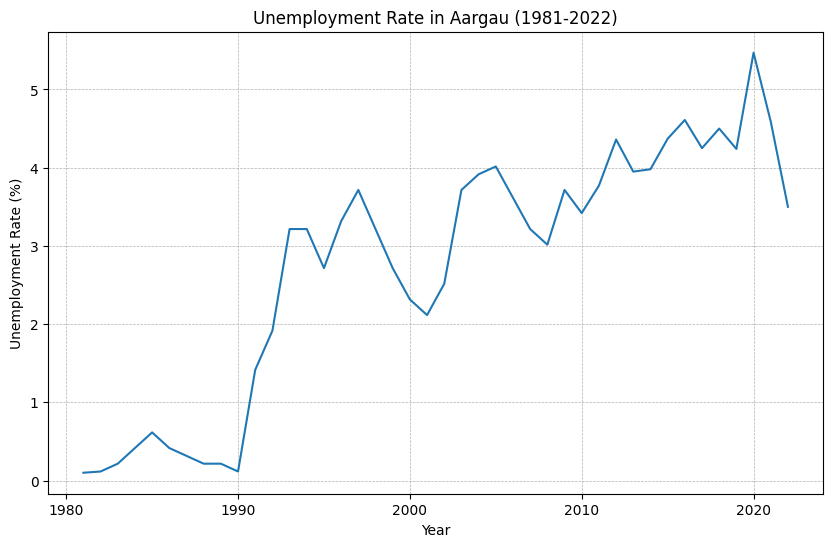

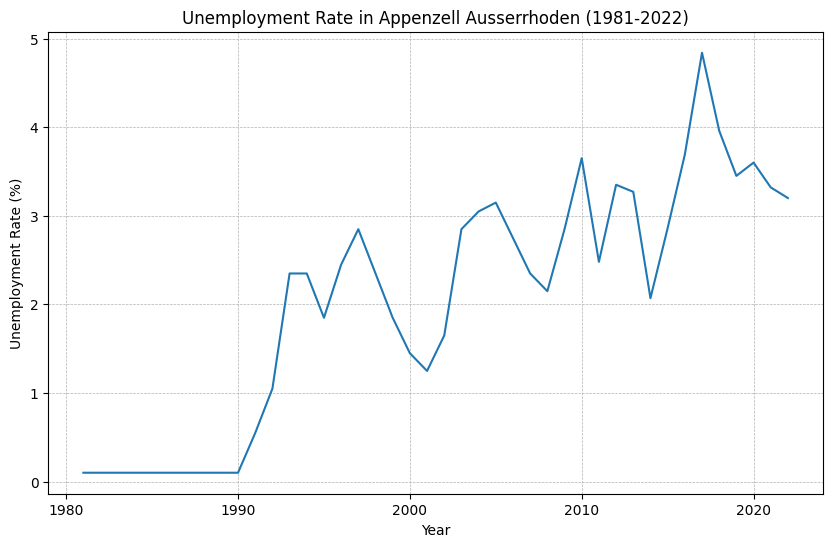

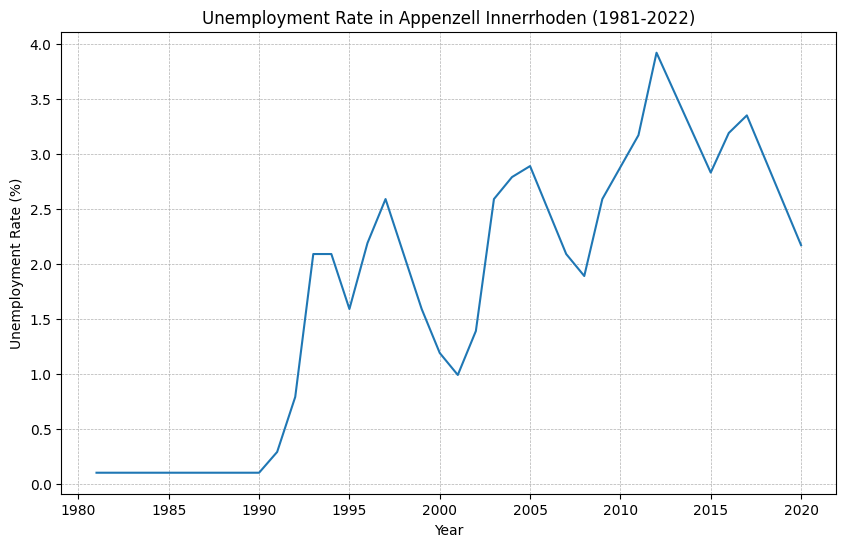

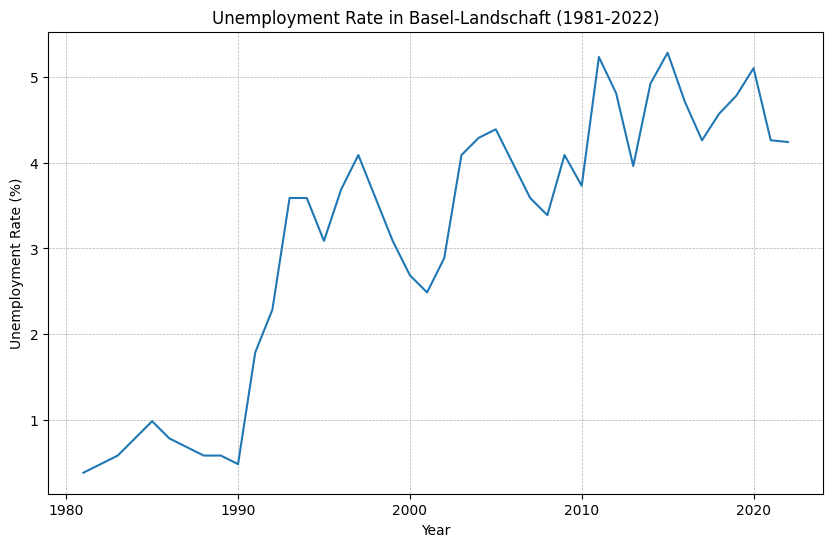

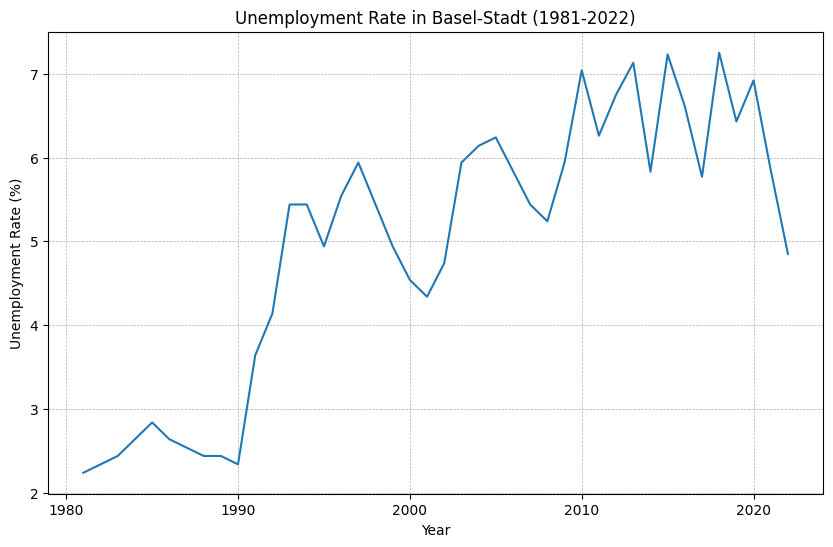

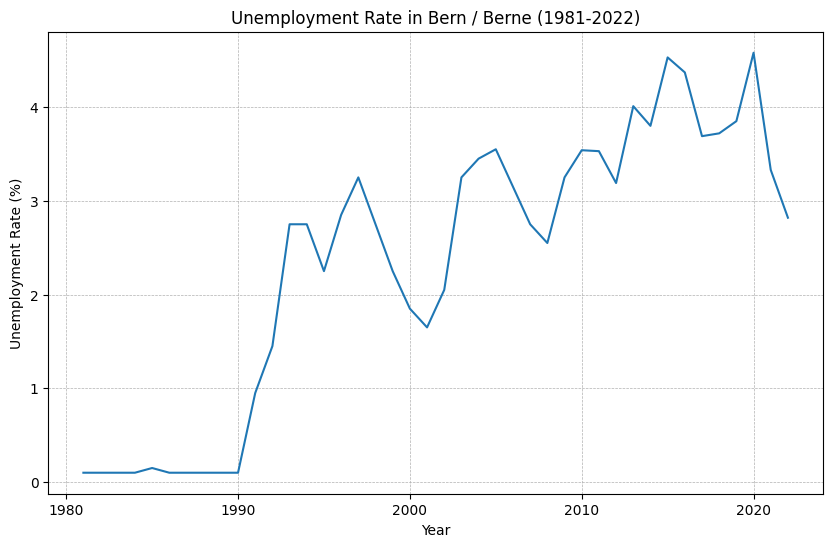

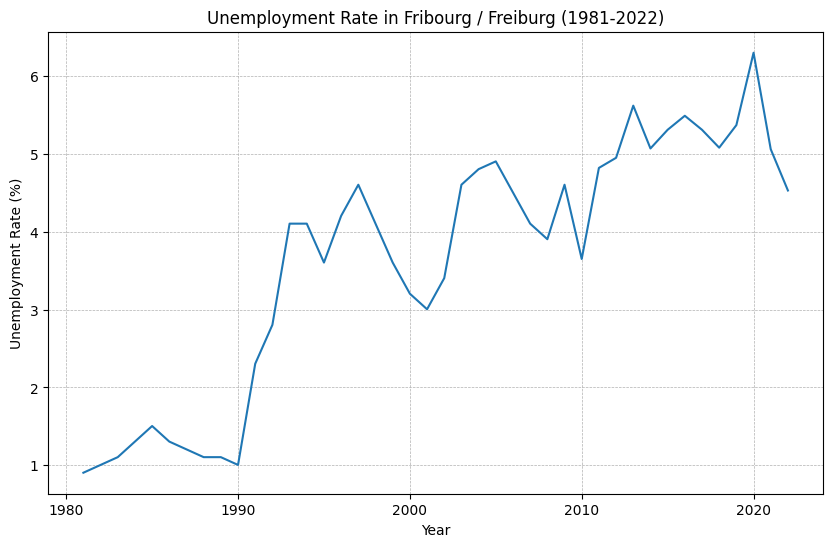

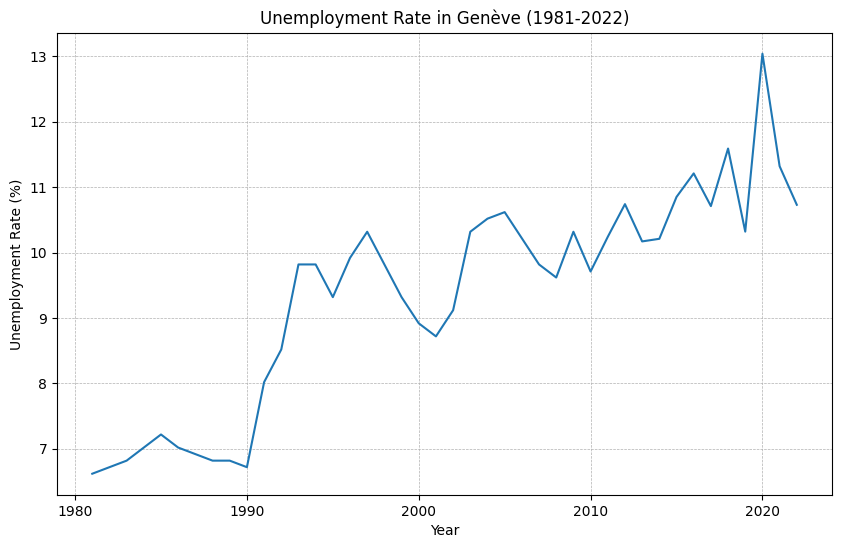

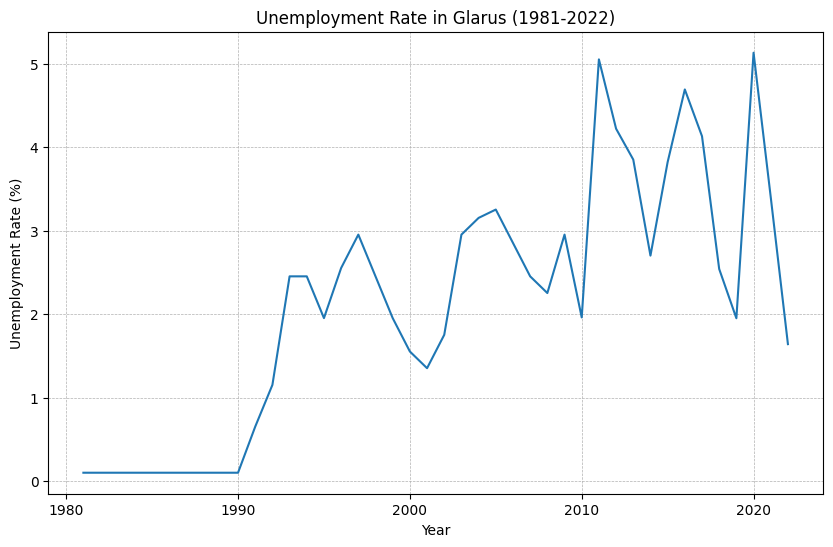

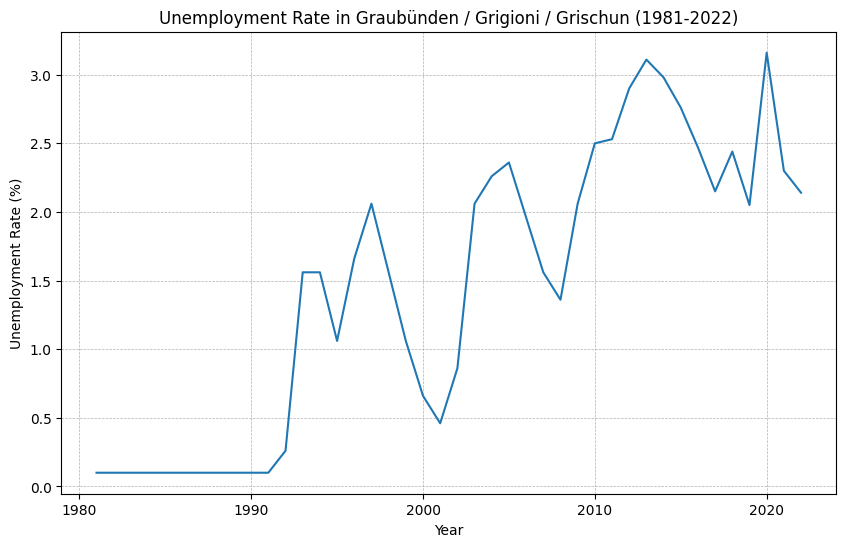

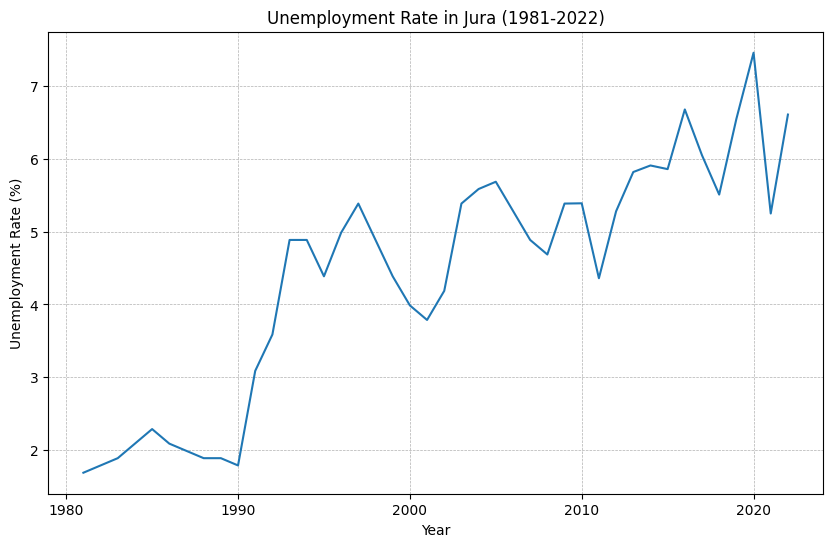

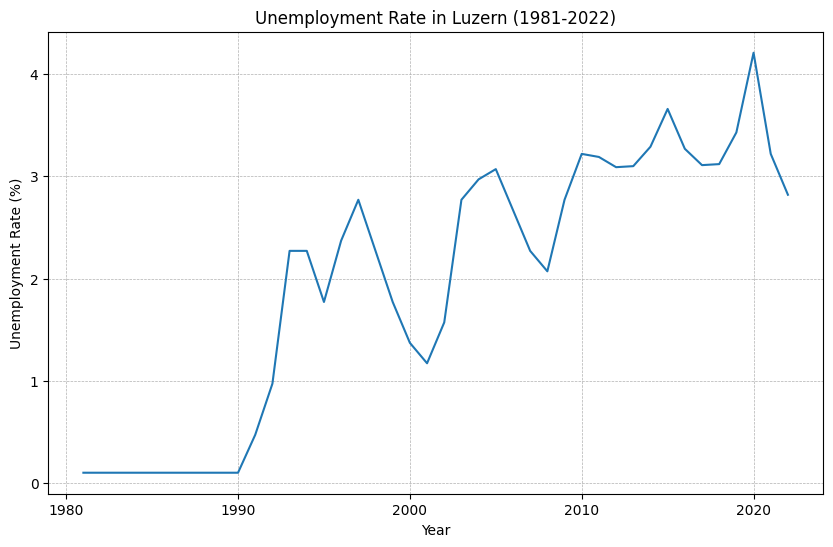

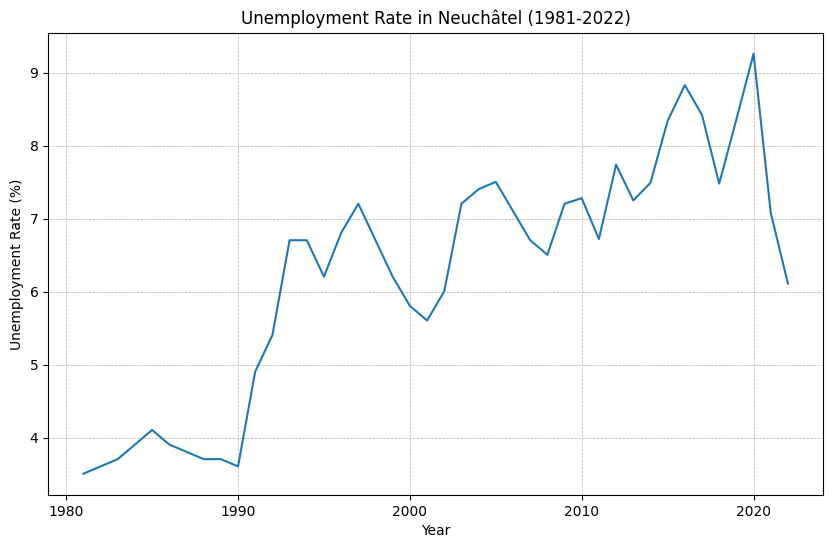

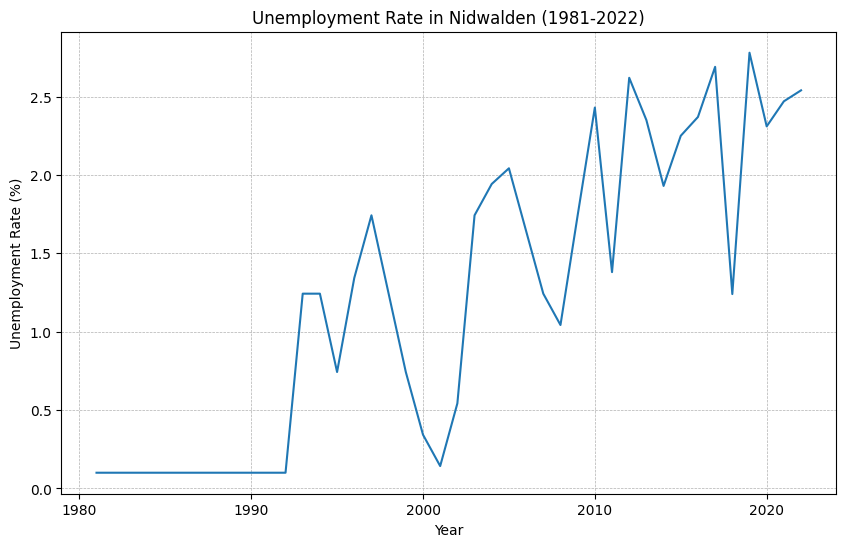

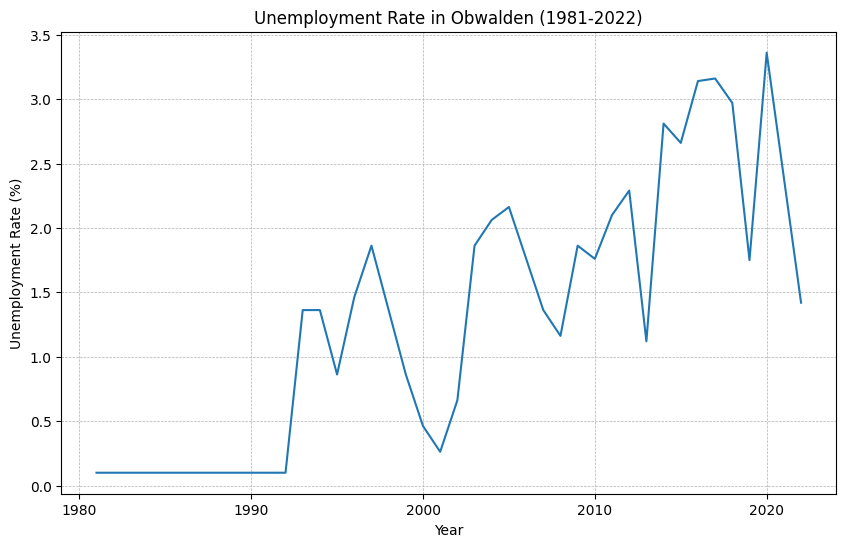

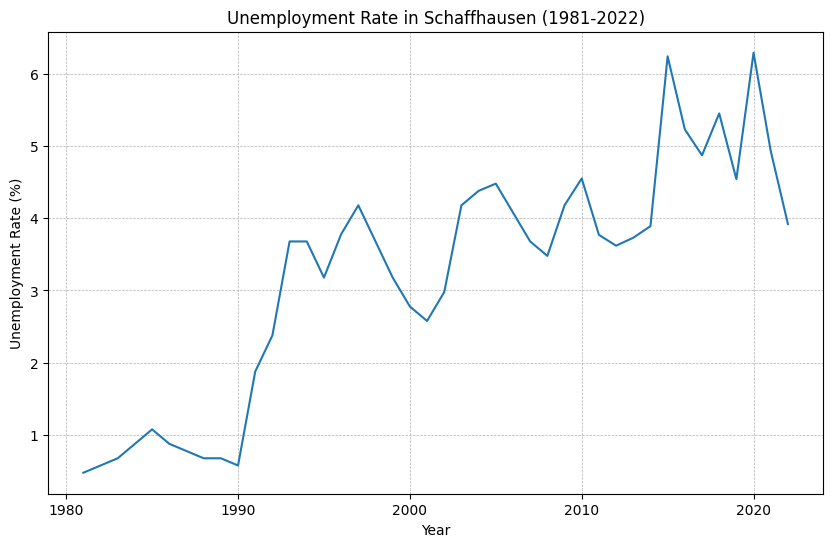

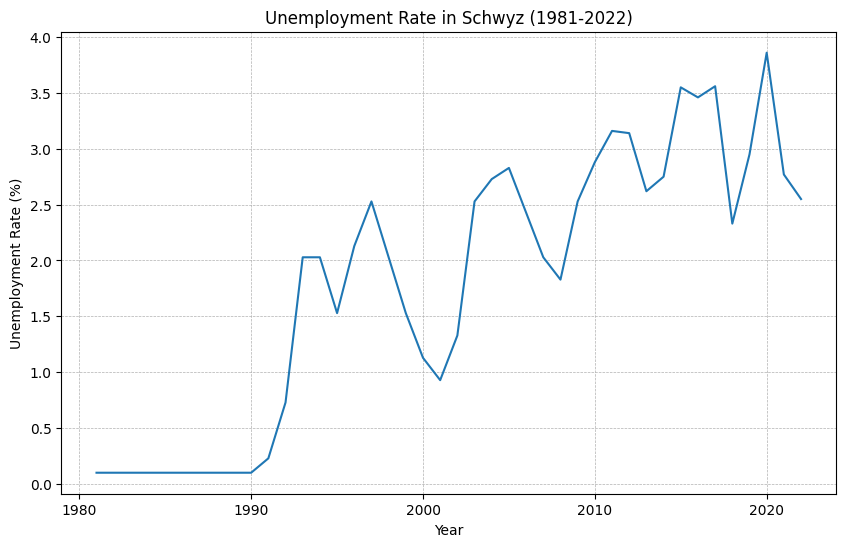

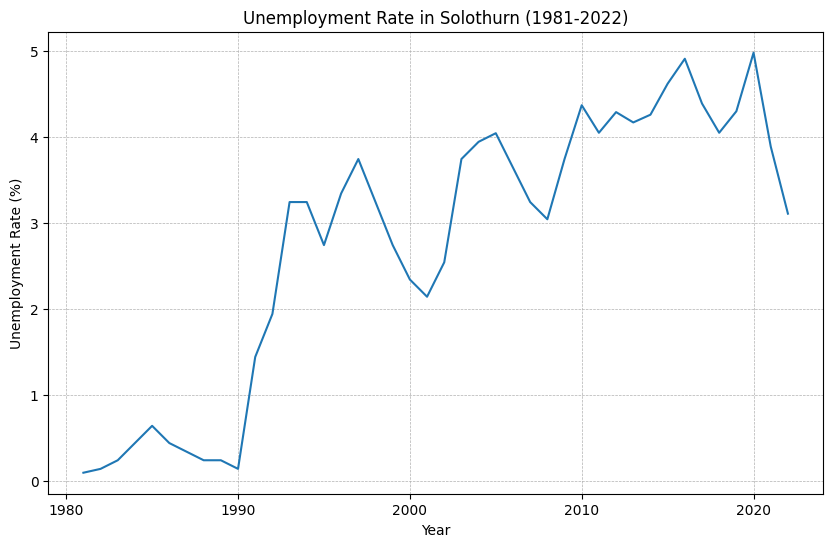

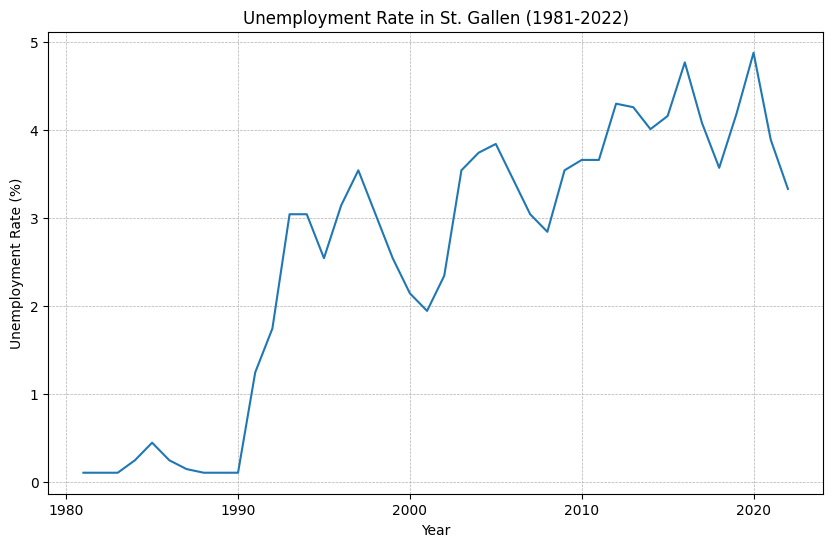

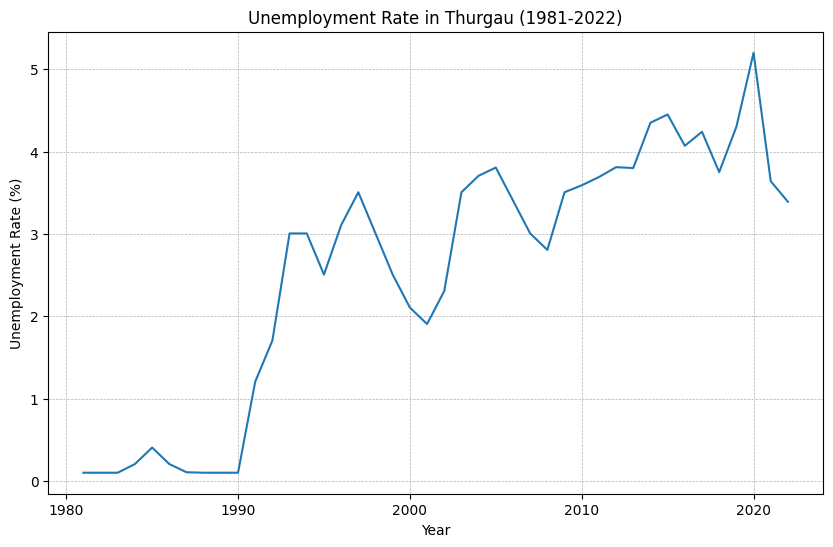

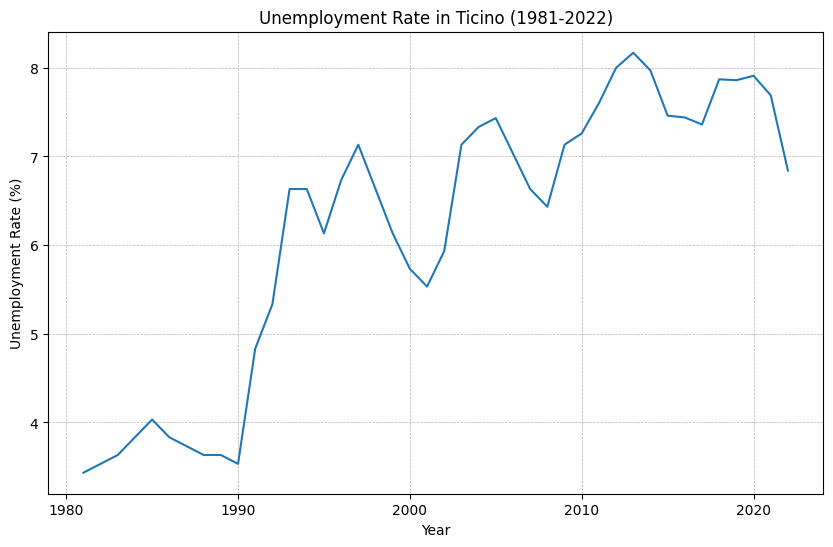

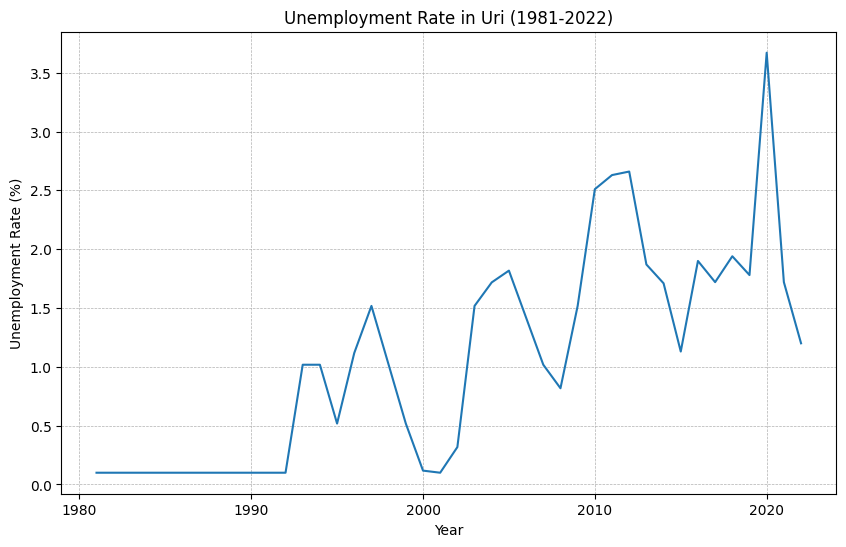

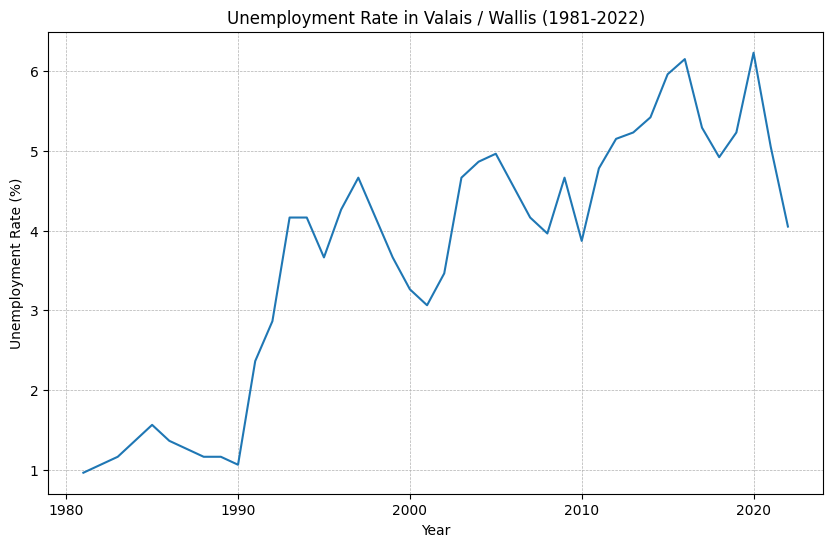

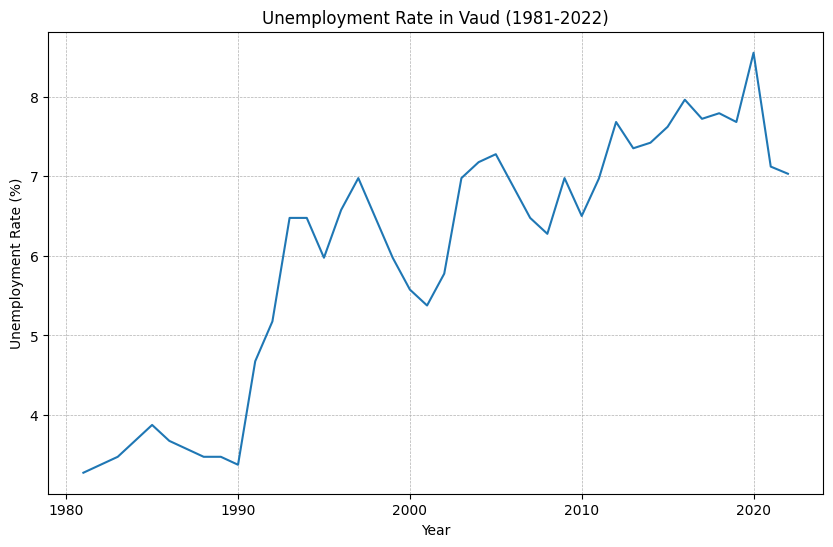

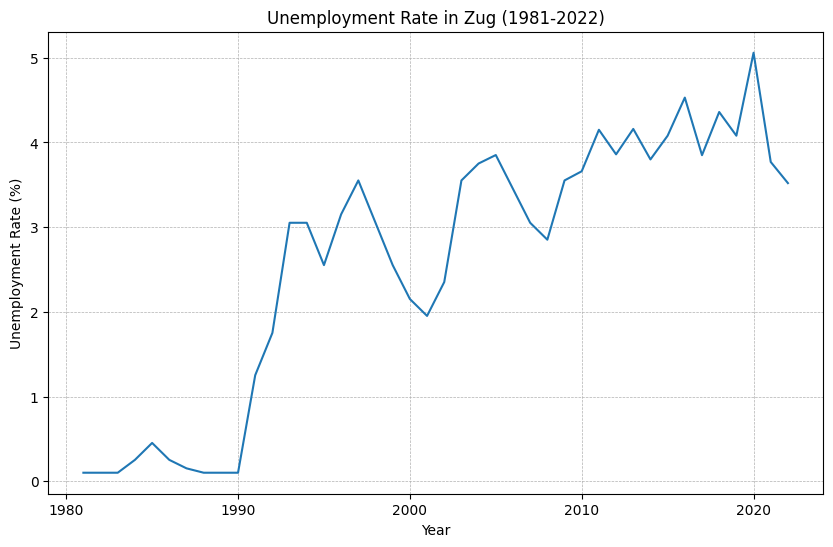

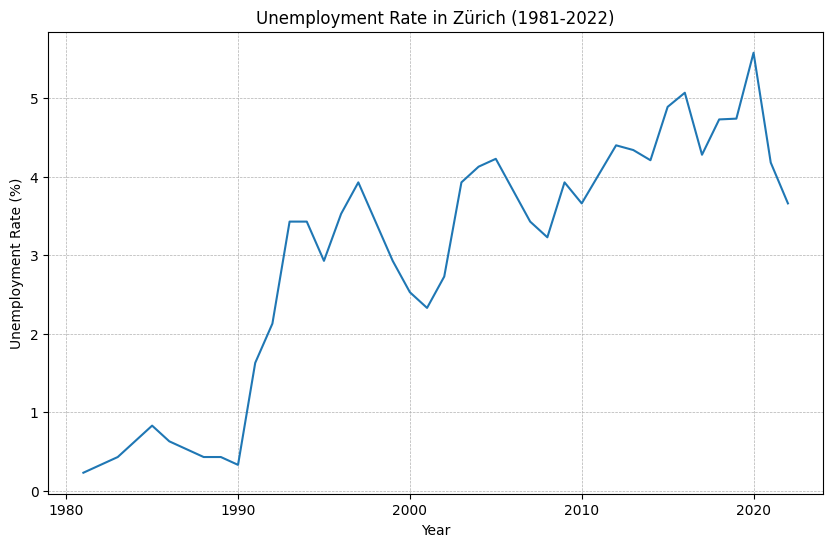

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

unemployment_rate = pd.read_csv(path + "unemployment_rate.csv")

# National unemployment rates for Switzerland (1981-2009) (Sourced from Macrotrends)
national_unemployment = {
    1981: 0.4, 1982: 0.5, 1983: 0.6, 1984: 0.8, 1985: 1.0, 1986: 0.8,
    1987: 0.7, 1988: 0.6, 1989: 0.6, 1990: 0.5, 1991: 1.8, 1992: 2.3,
    1993: 3.6, 1994: 3.6, 1995: 3.1, 1996: 3.7, 1997: 4.1, 1998: 3.6,
    1999: 3.1, 2000: 2.7, 2001: 2.5, 2002: 2.9, 2003: 4.1, 2004: 4.3,
    2005: 4.4, 2006: 4.0, 2007: 3.6, 2008: 3.4, 2009: 4.1
}

# Convert the national unemployment dictionary to a DataFrame
national_df = pd.DataFrame({
    'Year': list(national_unemployment.keys()),
    'unemployment': list(national_unemployment.values())
})

# Calculate the average difference between cantonal and national rates for 2010-2022
pivot_unemployment_rate = unemployment_rate.pivot(index='Year', columns='Canton', values='unemployment')
pivot_unemployment_rate = pivot_unemployment_rate.loc[2010:2022]
average_differences = pivot_unemployment_rate.mean() - pivot_unemployment_rate.mean().mean()

# Generate extrapolated cantonal data from 1981 to 2009
extrapolated_dfs = []

for canton in pivot_unemployment_rate.columns:
    # Get the average difference for the canton
    avg_diff = average_differences[canton]

    # Create DataFrame for extrapolated data
    extrapolated_df = pd.DataFrame({
        'Year': list(national_unemployment.keys()),
        'Canton': canton,
        'unemployment': [max(rate + avg_diff, 0.1) for rate in national_unemployment.values()]  # Ensure unemployment rate is not below 0.1% for realistic extrapolation
    })

    extrapolated_dfs.append(extrapolated_df)

extrapolated_df_combined = pd.concat(extrapolated_dfs, ignore_index=True)

# Combine extrapolated data (1981-2009) with actual data (2010-2022)
full_df = pd.concat([unemployment_rate, extrapolated_df_combined], ignore_index=True)

full_df = full_df.sort_values(by=['Year', 'Canton'])

print("Extrapolated Unemployment Rate (1990-2022) with National Adjustment")
print(full_df.head(26))

# Plot the extrapolation and actual data for each canton from 1990 to 2022
unique_cantons = full_df['Canton'].unique()

for canton in unique_cantons:
    unemployment_canton_data = full_df[full_df['Canton'] == canton]

    plt.figure(figsize=(10, 6))
    plt.plot(unemployment_canton_data['Year'], unemployment_canton_data['unemployment'], label='Extrapolated and Actual Data')
    plt.title(f'Unemployment Rate in {canton} (1981-2022)')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()


Above code adapted from Open AI, 2024.

The above data was saved as a csv file (extrapolated_canton_unemployment_1981_2022.csv). Therefore, below is the final data used for the feature unemployment rate:

In [ ]:
unemployment_rate = pd.read_csv(path + "extrapolated_canton_unemployment_1981_2022.csv")
unemployment_rate.head()

Year                  Canton  unemployment
0  1981                  Aargau      0.100000
1  1981  Appenzell Ausserrhoden      0.100000
2  1981   Appenzell Innerrhoden      0.100000
3  1981        Basel-Landschaft      0.387919
4  1981             Basel-Stadt      2.239458

In [ ]:
unemployment_rate.tail()

Year           Canton  unemployment
1079  2022              Uri          1.20
1080  2022  Valais / Wallis          4.05
1081  2022             Vaud          7.03
1082  2022              Zug          3.52
1083  2022           Zürich          3.66

**Populations**

We convert the data from the age column to match the format of the other dataframes to make the process of merging easy. Then we group the dataFrame by the columns Year, Canton, and Age Group and calculate the sum of Deaths, Net Migration, and population column for each group. The resulting DataFrame has one row per unique combination of these columns(e.g row with emigration sum for women in age group 10-19 in Aargau in 2012). Finally we merge all the dataframes for each feature into one.


In [ ]:
def convertAgeGroup(df, name="Age"):
  bins = list(range(0, 120, 10))  # 0-9, 10-19, 20-29, etc.
  labels = [f"{i}-{i + 9}" for i in bins[:-1]]
  return pd.cut(df[name], bins=bins, labels=labels, right=False)

populationData = pd.read_csv(path + "PopulationChange.csv", encoding='latin1')
populationData["Age"] = populationData['Age'].str.split(' ').str[0].astype(int)
populationData['Age Group'] = convertAgeGroup(populationData)
populationData = populationData.drop('Age', axis=1)
populationData = populationData.rename(columns={'Population on 31 December': 'Population', 'Net migration incl. change of population type': 'Net Migration'})
netImmigration = populationData.groupby(['Year', 'Canton', 'Age Group'], as_index=False)["Net Migration"].sum()
population = populationData.groupby(['Year', 'Canton', 'Age Group'], as_index=False)["Population"].sum()
Death = populationData.groupby(['Year', 'Canton', 'Age Group'], as_index=False)["Death"].sum()
populationChanges = pd.merge(netImmigration, population, on=['Year', 'Canton', 'Age Group'], how='outer')
populationChanges = pd.merge(populationChanges, Death, on=['Year', 'Canton', 'Age Group'], how='outer')
populationChanges.head()

<ipython-input-16-fcb6d9c3386e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  netImmigration = populationData.groupby(['Year', 'Canton', 'Age Group'], as_index=False)["Net Migration"].sum()
<ipython-input-16-fcb6d9c3386e>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population = populationData.groupby(['Year', 'Canton', 'Age Group'], as_index=False)["Population"].sum()
<ipython-input-16-fcb6d9c3386e>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

Year  Canton Age Group  Net Migration  Population  Death
0  1981  Aargau       0-9            348       58303     60
1  1981  Aargau     10-19            337       74910     43
2  1981  Aargau     20-29           1179       70278     71
3  1981  Aargau     30-39            503       73533     73
4  1981  Aargau     40-49             51       58348    121

**Merging Data**

Here we merge all the different dataframes into one big dataframe X_data.

In [ ]:
df1 = pd.merge(populationChanges, births, on=['Year', 'Canton', 'Age Group'], how='left')
df1['Births'] = df1['Births'].fillna(0)
df1 = pd.merge(df1, marriages, on=['Year', 'Canton', 'Age Group'], how='inner')
df1 = pd.merge(df1, divorces, on=['Year', 'Canton', 'Age Group'], how='inner')
df2 = pd.merge(unemployment_rate, gdp_pc, on=['Year', 'Canton'], how='outer')

X_data = pd.merge(df1, df2, on=['Year', 'Canton'], how='left')

X_data.head()

Year  Canton Age Group  Net Migration  Population  Death  Births  \
0  1981  Aargau     10-19            337       74910     43   158.0   
1  1981  Aargau     20-29           1179       70278     71  3753.0   
2  1981  Aargau     30-39            503       73533     73  2052.0   
3  1981  Aargau     40-49             51       58348    121    65.0   
4  1981  Aargau     50-59            -77       48347    287     0.0   

   marriages  Divorces  unemployment        GDP_pc  
0          2         0           0.1  20072.994462  
1       1442        95           0.1  20072.994462  
2        208       232           0.1  20072.994462  
3         33        98           0.1  20072.994462  
4         11        25           0.1  20072.994462

**Shifting Years**

**Important Intuition**: Each feature data will be an input for the marriages of the next to next year. For instance, the feature data of 2015 determines the number of marriages in 2017 since we assume that marriages take time to "materizalize". To do so, we shift the rows of the Marriages column so that they are in the corresponding row of the 'year-2' year.

In [ ]:
X_data["marriages"] = X_data.groupby(["Canton", "Age Group"])["marriages"].shift(-2)

# Drop rows where Marriages_next_year is NaN (no next year data)
X_data = X_data.dropna(subset=["marriages"])
X_data = X_data.rename(columns={'marriages': 'marriages in Y+2'})
X_data.head()

Year  Canton Age Group  Net Migration  Population  Death  Births  \
0  1981  Aargau     10-19            337       74910     43   158.0   
1  1981  Aargau     20-29           1179       70278     71  3753.0   
2  1981  Aargau     30-39            503       73533     73  2052.0   
3  1981  Aargau     40-49             51       58348    121    65.0   
4  1981  Aargau     50-59            -77       48347    287     0.0   

   marriages in Y+2  Divorces  unemployment        GDP_pc  
0               2.0         0           0.1  20072.994462  
1            1438.0        95           0.1  20072.994462  
2             251.0       232           0.1  20072.994462  
3              39.0        98           0.1  20072.994462  
4               4.0        25           0.1  20072.994462

In [ ]:
X_data.shape

(8528, 11)

## **Imputing Missing Values, Encoding, Scaling, and Splitting Data**

In [ ]:
missing_values = X_data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

unemployment      56
GDP_pc          2952
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = X_data.drop(columns=['marriages in Y+2', 'Year'], axis=1)
y = X_data['marriages in Y+2']

X['Canton_AgeGroup'] = X['Canton'] + "_" + X['Age Group']
X = X.drop(columns=['Canton', 'Age Group'])

# Encoding
X = pd.get_dummies(X, columns=['Canton_AgeGroup'], drop_first=True, dtype=int)

# Separate numeric and categorical (combined) features
numeric_features = X.columns.difference(['Canton_AgeGroup'])
combined_feature = ['Canton_AgeGroup']

# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Missing values
imputer = KNNImputer(n_neighbors=5)
X_train[numeric_features] = imputer.fit_transform(X_train[numeric_features])
X_test[numeric_features] = imputer.fit_transform(X_test[numeric_features])

# Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

X_train.head()

Net Migration  Population     Death    Births  Divorces  unemployment  \
7279      -0.366889    0.716191  7.650946 -0.363225 -0.461174      0.702098   
1908      -0.401280   -0.199753 -0.205860 -0.363225 -0.224094     -0.356940   
5465       3.143785    0.627674 -0.447766  1.031321  0.058144      2.748273   
843       -0.197683   -0.690216 -0.484983 -0.353561 -0.325700     -1.286810   
6887      -0.247207   -0.827233 -0.389874 -0.363225 -0.472464     -1.286810   

        GDP_pc  Canton_AgeGroup_Aargau_20-29  Canton_AgeGroup_Aargau_30-39  \
7279  0.110932                     -0.074561                     -0.071073   
1908  0.396253                     -0.074561                     -0.071073   
5465 -0.110721                     -0.074561                     -0.071073   
843   0.232339                     -0.074561                     -0.071073   
6887 -1.186671                     -0.074561                     -0.071073   

      Canton_AgeGroup_Aargau_40-49  ...  Canton_AgeGroup_Zug_70-79  \
7279                     -0.071073  ...                  -0.072254   
1908                     -0.071073  ...                  -0.072254   
5465                     -0.071073  ...                  -0.072254   
843                      -0.071073  ...                  -0.072254   
6887                     -0.071073  ...                  -0.072254   

      Canton_AgeGroup_Zug_80-89  Canton_AgeGroup_Zürich_10-19  \
7279                  -0.069872                     -0.071073   
1908                  -0.069872                     -0.071073   
5465                  -0.069872                     -0.071073   
843                   -0.069872                     -0.071073   
6887                  -0.069872                     -0.071073   

      Canton_AgeGroup_Zürich_20-29  Canton_AgeGroup_Zürich_30-39  \
7279                     -0.072254                     -0.071073   
1908                     -0.072254                     -0.071073   
5465                     -0.072254                     -0.071073   
843                      -0.072254                     -0.071073   
6887                     -0.072254                     -0.071073   

      Canton_AgeGroup_Zürich_40-49  Canton_AgeGroup_Zürich_50-59  \
7279                     -0.063537                     -0.072254   
1908                     -0.063537                     -0.072254   
5465                     -0.063537                     -0.072254   
843                      -0.063537                     -0.072254   
6887                     -0.063537                     -0.072254   

      Canton_AgeGroup_Zürich_60-69  Canton_AgeGroup_Zürich_70-79  \
7279                     -0.075688                     -0.071073   
1908                     -0.075688                     -0.071073   
5465                     -0.075688                     -0.071073   
843                      -0.075688                     -0.071073   
6887                     -0.075688                     -0.071073   

      Canton_AgeGroup_Zürich_80-89  
7279                     15.419468  
1908                     -0.064853  
5465                     -0.064853  
843                      -0.064853  
6887                     -0.064853  

[5 rows x 214 columns]

**Preparing Training and Test Data Above**

1. **Spliting the data & selecting numeric features.**
2. **Scaling Data:** By scaling the data of the numeric data we prevent that features with large magnitudes dominate calculations like KNN. Additionally it helps achieve convergence in models like gradient descent and makes coefficients in models like linear regression easier to compare, as all features are on the same scale.

# **Building Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data_range = X_data['marriages in Y+2'].max() - X_data['marriages in Y+2'].min()
RMSE_values = []
r2_values = []

def model_evaluation(y_test, y_pred):
  # Calculate RMSE on test data
  RMSE = root_mean_squared_error(y_test, y_pred)
  print("RMSE:", RMSE)
  RMSE_values.append(RMSE)
  print("Range of marriages:", data_range)
  r2 = r2_score(y_test, y_pred)
  r2_values.append(r2)
  print("R-squared:", r2)

  # Plot the actual vs predicted values in the original scale
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5, s=10)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of equality

  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs. Predicted Values')
  plt.show()
  print(" ")
  errors_rf = y_test - y_pred
  plt.hist(errors_rf, bins=50)
  plt.xlabel('Prediction Error (Actual - Predicted)')
  plt.title('Distribution of Prediction Errors')
  plt.show()


## **Linear Regression Models**

**Linear Regression**

Linear regression is the simplest model in this analysis and assumes a linear relationship between the independent and dependent variables. It calculates the coefficients of the independent variables by minimising the sum of the quadratic errors between the observed and predicted values. This method is sensitive to multicollinearity, where high correlations between the independent variables can destabilise the estimated coefficients. In addition, linear regression requires standardised numerical inputs to ensure that variables with different scales do not disproportionately affect the model. Although an effective tool for datasets with clear linear relationships, linear regression struggles to capture complex, non-linear patterns or to handle datasets with many irrelevant features, which can lead to poor generalisation.

RMSE: 53.450695850430264
Range of marriages: 3270.0
R-squared: 0.9681551865444761


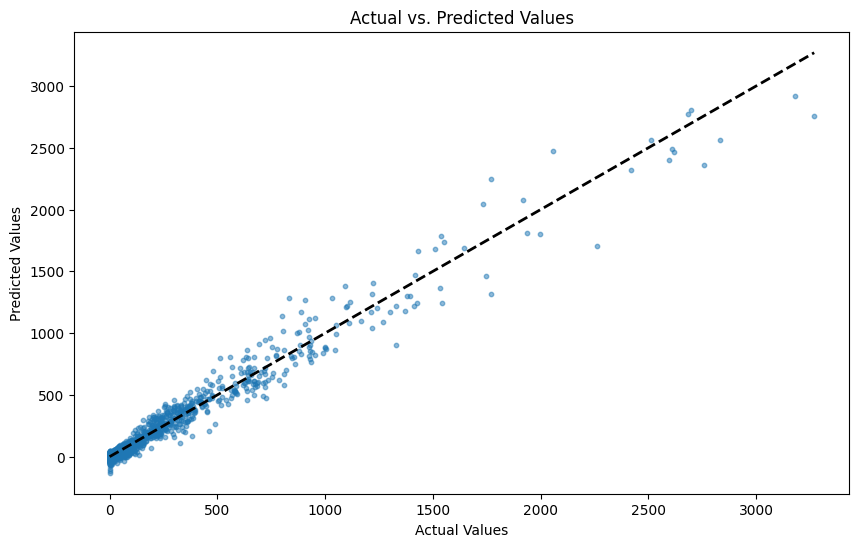

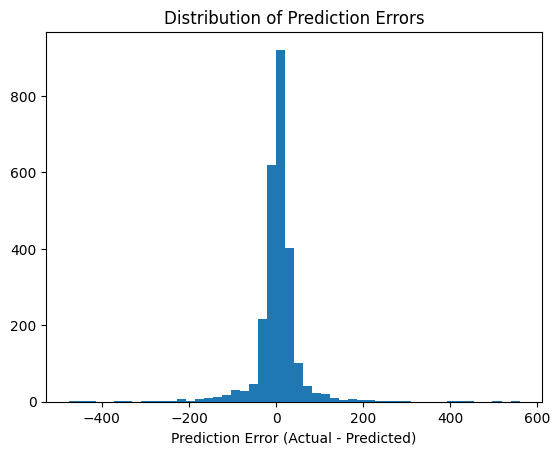

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
model_evaluation(y_test, y_pred)

**Lasso Regression**

Lasso regression improves on linear regression by incorporating L1 regularisation, penalising the coefficients' absolute values. This regularisation technique pushes some coefficients to exactly zero, effectively performing feature selection. By retaining only the most relevant variables, Lasso reduces model complexity and improves generalisation, especially in high-dimensional datasets. However, choosing the regularisation parameter (alpha) is crucial, as it must be tuned to balance model simplicity and predictive accuracy. Too low an alpha leads to a linear regression-like model, while too high an alpha can lead to the removal of important variables, resulting in underfitting. Lasso is particularly useful when working with datasets where many features may be irrelevant, as it helps to identify and retain only the most influential predictors.

Best alpha: 0.0018329807108324356
RMSE: 53.113955328571436
Range of marriages: 3270.0
R-squared: 0.9685551686208217


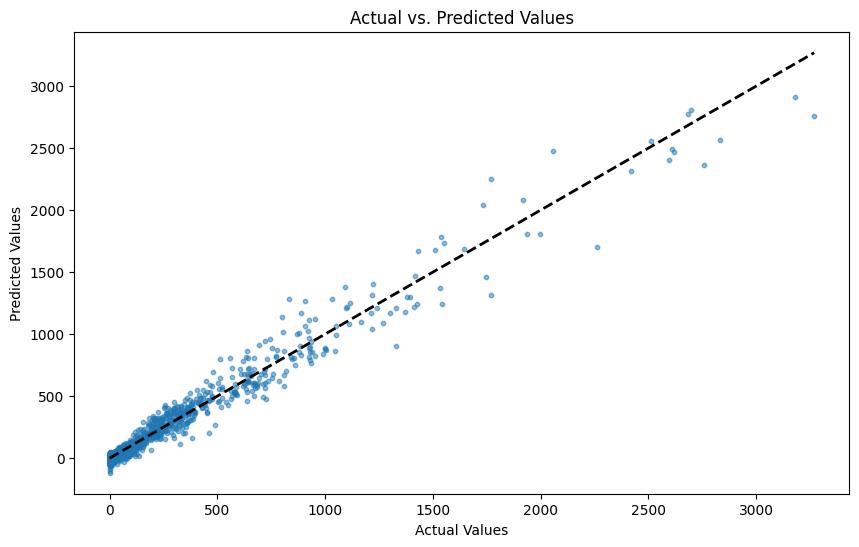

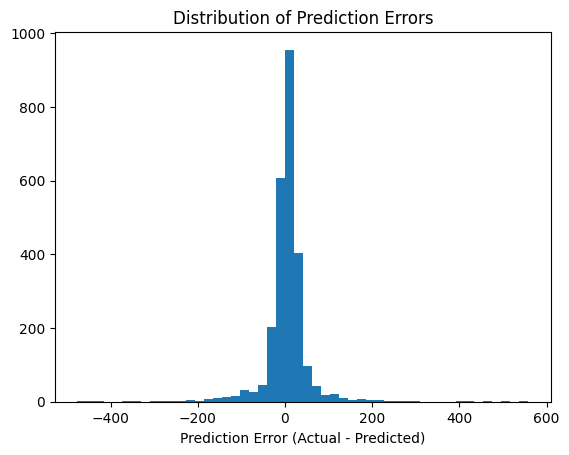

In [ ]:
# Lasso Regression with cross-validation and hyperparameter tuning
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': np.logspace(-4, 4, 20)}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best alpha:", grid_search.best_params_['alpha'])

# Evaluate the model on test data
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

model_evaluation(y_test, y_pred2)

**Ridge Regression**

Ridge regression addresses multicollinearity and overfitting through L2 regularisation, which penalises the sum of squares of the coefficients. Unlike Lasso, Ridge does not force the coefficients to zero, but reduces their magnitude to ensure that all variables remain in the model. This feature makes Ridge particularly effective when all variables are expected to contribute significantly to the model, albeit to varying degrees. The strength of Ridge lies in its ability to stabilise coefficient estimates in the presence of multicollinearity, providing greater stability than linear regression while preserving all the features. As with Lasso, the regularisation parameter (alpha) must be chosen carefully, as high values could oversimplify the model, while low values could lead to overfitting. Ridge is well suited to situations where a dataset contains interrelated variables and each feature contributes, however minimally, to the predictive power of the model.

Best alpha: 0.0001
RMSE: 53.4506592186754
Range of marriages: 3270.0
R-squared: 0.9681552301933373


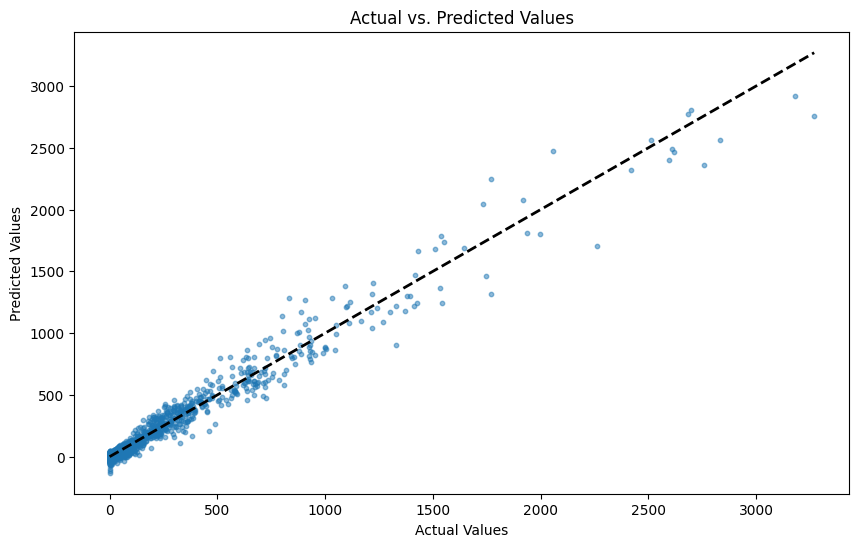

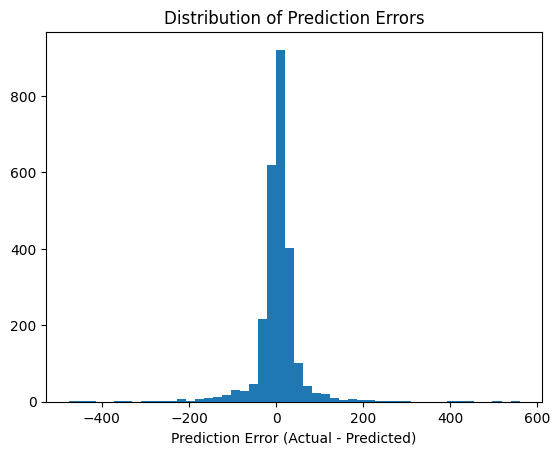

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 20)}  # Range of alpha values to test

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best alpha value found
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best model to predict and evaluate RMSE
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test)

model_evaluation(y_test, y_pred3)

## **Tree models**

**Decision Tree Regressor with Cross-Validation and Hyperparameter Tuning**

The Decision Tree Regressor was optimised through the selection of key hyperparameters, including the maximum tree depth (max_depth) and the minimum number of samples required to split a node (min_samples_split). The hyperparameters were tuned using GridSearchCV, which performed an exhaustive search on a grid of parameters (e.g., varying the depth from 10 to 30 and the minimum number of samples from 2 to 10). This approach enabled the selection of the optimal combination, resulting in a reduction of the root mean square error (RMSE) on the training set by identifying the most suitable model based on cross-validation. Despite the optimisation process, the Decision Tree model demonstrated inferior performance in comparison to more complex models, such as XGBoost, particularly in scenarios characterised by high variability or complex non-linear relationships between variables. However, the tree structure of the model facilitates the interpretation of each decision, enabling the clear visualisation of decisions based on variable values. Cross-validation demonstrated that, despite certain constraints, the model offers a robust foundation for interpreting the data dynamics and can serve as a preliminary framework for more sophisticated models. The methodology strikes a balance between accuracy and transparency, although the model is more susceptible to outliers, which can markedly influence predictions.

Best Parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-validation RMSE for Decision Tree: 49.54664685310489
RMSE: 66.0293068331135
Range of marriages: 3270.0
R-squared: 0.9514034477758868


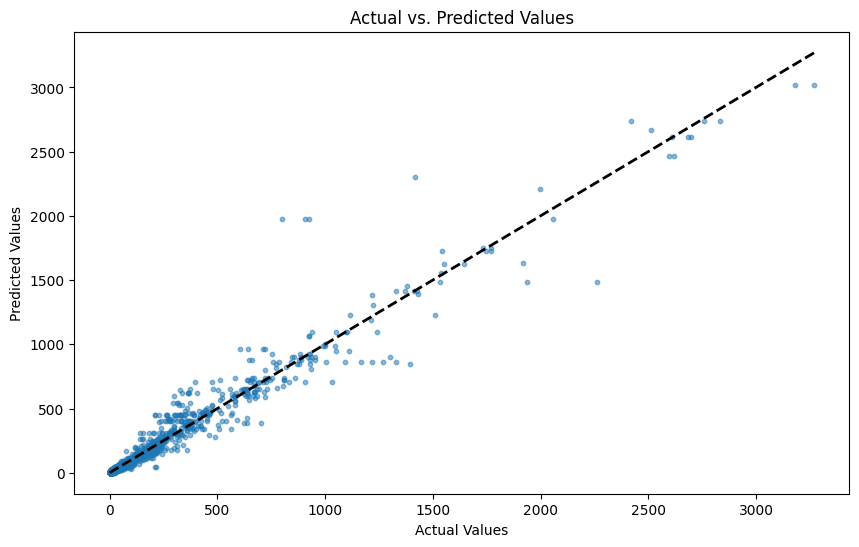

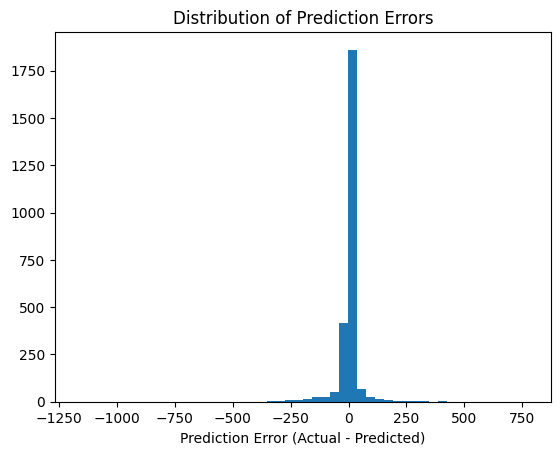

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid_tree = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Apply GridSearchCV with cross-validation
grid_search_tree = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
best_tree_model = grid_search_tree.best_estimator_

# Cross-validation score
cv_score_tree = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation RMSE for Decision Tree:", np.sqrt(-cv_score_tree.mean()))

# Evaluate on test set
y_pred4 = best_tree_model.predict(X_test)
model_evaluation(y_test, y_pred4)

**Random Forest Regressor with Cross-Validation and Hyperparameter Tuning**

The Random Forest Regressor was selected on the basis of its capacity to accommodate non-linear and intricate relationships between variables, as a consequence of its structure, which is based on an ensemble of decision trees. This approach mitigates the risk of overfitting by enhancing the model's capacity to generalise to unseen data.
In order to optimise the performance of the model, RandomizedSearchCV was employed for the purpose of searching for hyperparameters. The selection of parameters, including the number of trees (n_estimators) and maximum tree depth (max_depth), was constrained to specific values (100, 150, 200 trees and depths of 10, 20, None) to achieve an optimal balance between predictive accuracy and computational complexity. Other hyperparameters, such as min_samples_split and min_samples_leaf, were selected from a reduced set of values with the objective of maintaining a simpler model and preventing overfitting.
The validation process was conducted via cross-validation with three folds, with the objective of obtaining a more reliable estimate of the model's performance. The application of RMSE cross-validation enabled the model to achieve a more accurate calibration of parameters and enhance its overall robustness.
The selection of the Random Forest was predicated on its capacity to process intricate datasets, manage highly correlated variables, and accommodate diverse data distributions. Furthermore, the application of a random search facilitated the optimisation of hyperparameter tuning, thereby enabling a more expeditious and precise evaluation of the model.

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Cross-validation RMSE for Random Forest: 37.35785576797359
RMSE: 41.67039325069179
Range of marriages: 3270.0
R-squared: 0.9806452671942487


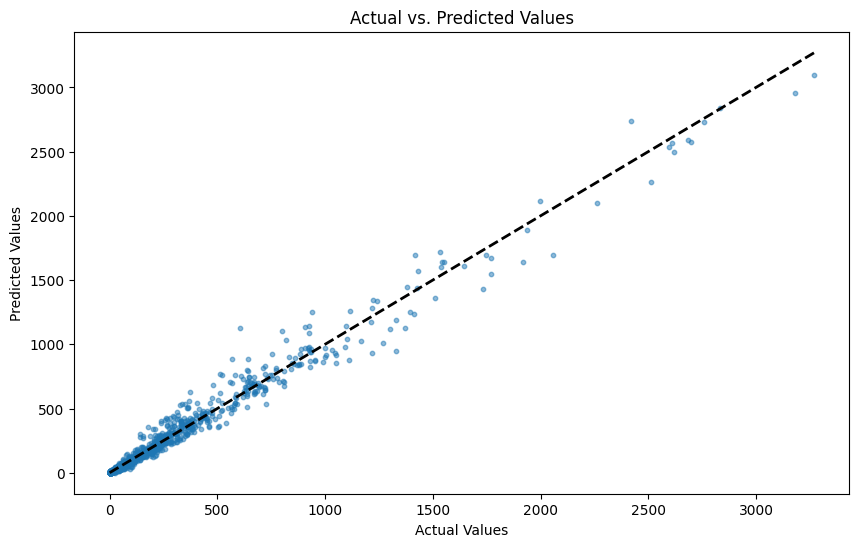

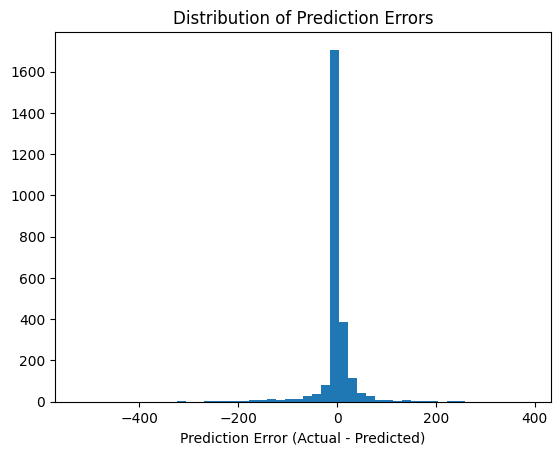

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Define the model
random_forest_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune (reduced grid for faster execution)
param_grid_rf = {
    'n_estimators': [100, 150, 200],  # Fewer options for faster search
    'max_depth': [None, 10, 20],      # Simplified range
    'min_samples_split': [2, 5],     # Reduced combinations
    'min_samples_leaf': [1, 2],      # Fewer choices
    'bootstrap': [True]              # Fixed one option for speed
}

# Apply RandomizedSearchCV with fewer iterations
random_search_rf = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_grid_rf,
    n_iter=10,  # Limit number of iterations for speed
    cv=3,       # Fewer cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
best_rf_model = random_search_rf.best_estimator_

# Cross-validation score
cv_score_rf = cross_val_score(best_rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross-validation RMSE for Random Forest:", np.sqrt(-cv_score_rf.mean()))

# Evaluate on test set
y_pred = best_rf_model.predict(X_test)
model_evaluation(y_test, y_pred)

## **XGBoost Model**

The methodology employed by this model is based on the iterative construction of decision trees, in which each successive tree attempts to correct errors identified in previous models. This process serves to reduce both bias and variance, thus making it an optimal choice for complex, high-dimensional datasets.
An important distinguishing feature of XGBoost is its ability to automatically handle missing values and optimize the use of computational resources, thus facilitating the data preprocessing phase. However, it is essential that all variables be converted to numerical format in order for the model to process them effectively.
During the implementation phase, special attention was paid to optimizing key hyperparameters, including learning rate and maximum tree depth. The accuracy of the model was further improved by optimizing the learning process, which aimed to avoid overfitting and ensure good generalization of the data. Due to its architectural structure, XGBoost fits well with data sets that have nonlinear relationships and interdependent variables, making it an effective tool for providing highly reliable predictions.

RMSE: 47.09975248231776
Range of marriages: 3270.0
R-squared: 0.9752731250837505


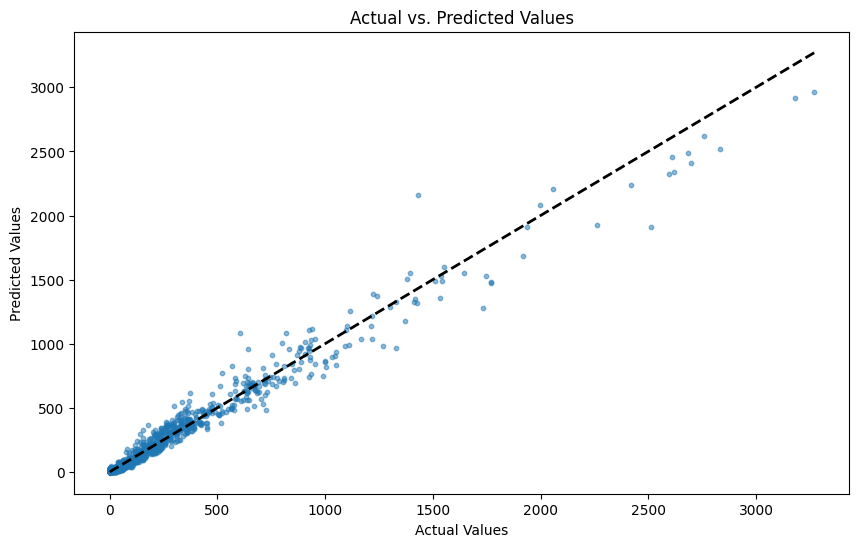

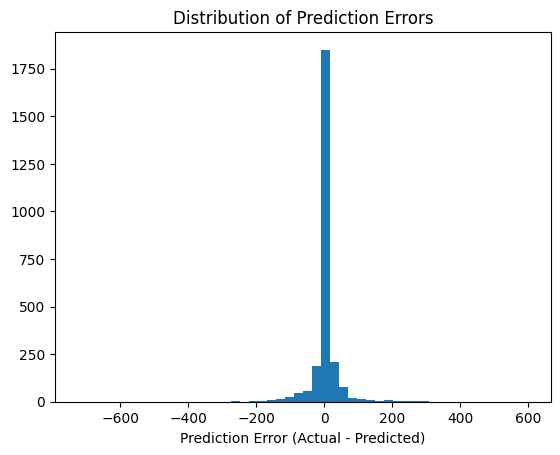

                                Feature  Importance
3                                Births    0.462386
47   Canton_AgeGroup_Bern / Berne_20-29    0.057225
206        Canton_AgeGroup_Zürich_10-19    0.046158
208        Canton_AgeGroup_Zürich_30-39    0.042074
207        Canton_AgeGroup_Zürich_20-29    0.040751
..                                  ...         ...
89           Canton_AgeGroup_Jura_40-49    0.000000
90           Canton_AgeGroup_Jura_50-59    0.000000
91           Canton_AgeGroup_Jura_60-69    0.000000
92           Canton_AgeGroup_Jura_70-79    0.000000
213        Canton_AgeGroup_Zürich_80-89    0.000000

[214 rows x 2 columns]


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

model_evaluation(y_test, y_pred)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

## **Neural Network**

Neural Network was configured by random search to optimise the hidden layer size, activation type and solver. The model demonstrated proficiency in discerning intricate patterns through the neural network; however, its functionality was constrained by the necessity of managing a considerable number of parameters. In comparison with decision tree-based models, the MLP demonstrated superior adaptability to non-linear data, although the training time was longer. Despite the promising results, the computational complexity and the necessity for extensive tuning restrict its applicability in comparison to simpler models, unless we are dealing with particularly complex scenarios, where the capacity to learn nonlinear relationships is of paramount importance.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 751, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/loc

Best Parameters for MLP Regressor: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'relu'}
Cross-validation RMSE for MLP Regressor: 32.2175047283899
RMSE: 50.156823986957825
Range of marriages: 3270.0
R-squared: 0.9719590941561083


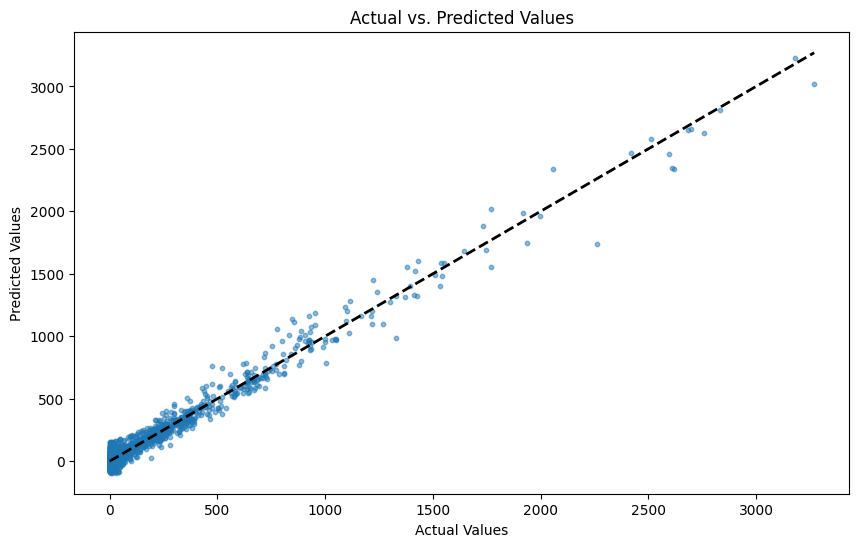

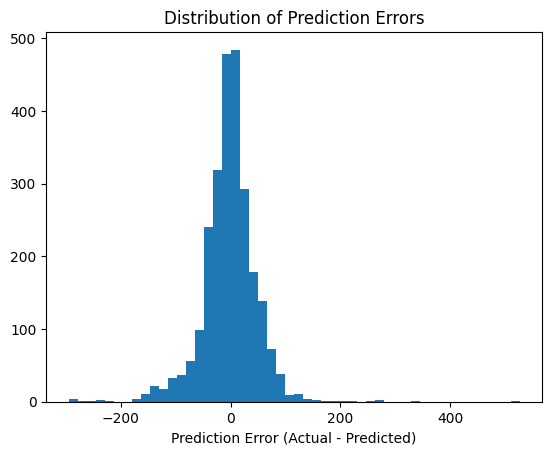

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Define the model
mlp_model = MLPRegressor(max_iter=500, random_state=42)  # Reduced max_iter for faster training

# Define a smaller set of hyperparameters
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Use RandomizedSearchCV for faster tuning
random_search_mlp = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_dist_mlp,
    n_iter=20,  # Perform 20 random combinations (adjust as needed for speed/quality tradeoff)
    cv=3,  # Reduce the number of cross-validation folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the training data
random_search_mlp.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters for MLP Regressor:", random_search_mlp.best_params_)
best_mlp_model = random_search_mlp.best_estimator_

# Cross-validation score
cv_score_mlp = cross_val_score(best_mlp_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross-validation RMSE for MLP Regressor:", np.sqrt(-cv_score_mlp.mean()))

# Evaluate on test set
y_pred = best_mlp_model.predict(X_test)
model_evaluation(y_test, y_pred)

## **Stacking**

Combining Ridge, Random Forest, and Neural Network Models.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score

base_estimators = [
    ('ridge', Ridge()),
    ('forest', best_rf_model),
    ('mlp', best_mlp_model)
]

stack_model = StackingRegressor(estimators=base_estimators, final_estimator=Ridge())

stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Root Mean Squared Error:", rmse)
print("R2:", r2)

Root Mean Squared Error: 37.336395832521134
R2: 0.9844619409840196


RMSE: 37.336395832521134
Range of marriages: 3270.0
R-squared: 0.9844619409840196


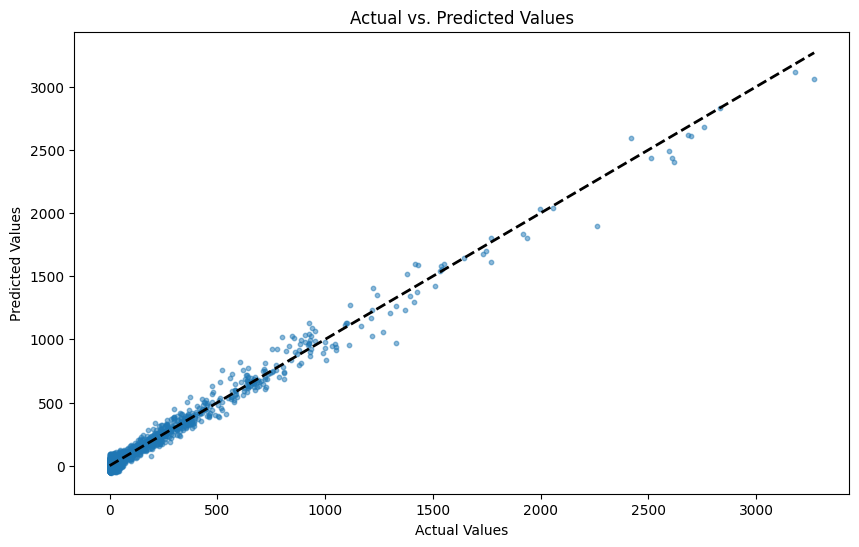

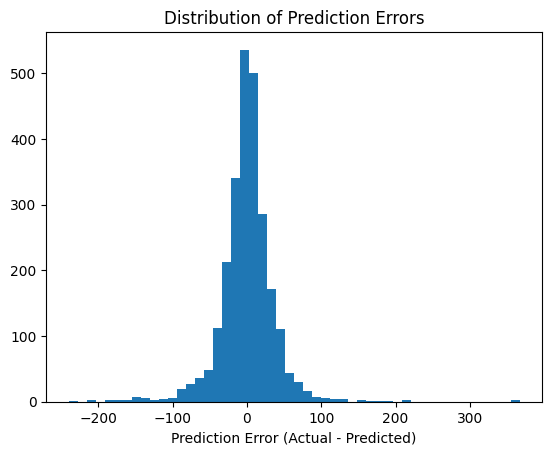

In [ ]:
model_evaluation(y_test, y_pred)

## **Investigating Correlations**

In [ ]:
import numpy as np

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame of independent variables (X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                          feature        VIF
0                   Net Migration   4.521674
1                      Population  65.884537
2                           Death  61.452722
3                          Births  16.418704
4                        Divorces  15.024214
..                            ...        ...
209  Canton_AgeGroup_Zürich_40-49   4.613335
210  Canton_AgeGroup_Zürich_50-59   4.607723
211  Canton_AgeGroup_Zürich_60-69   5.337452
212  Canton_AgeGroup_Zürich_70-79   9.179936
213  Canton_AgeGroup_Zürich_80-89  16.730556

[214 rows x 2 columns]


Above code adapted from Open AI, 2024.

In [ ]:
correlation_matrix = X_train.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                              Net Migration  Population     Death    Births  \
Net Migration                      1.000000    0.410202 -0.158273  0.598918   
Population                         0.410202    1.000000  0.134681  0.574577   
Death                             -0.158273    0.134681  1.000000 -0.134508   
Births                             0.598918    0.574577 -0.134508  1.000000   
Divorces                           0.257790    0.752127 -0.082126  0.601098   
...                                     ...         ...       ...       ...   
Canton_AgeGroup_Zürich_40-49      -0.001533    0.291171  0.005969  0.023673   
Canton_AgeGroup_Zürich_50-59      -0.096664    0.264180  0.058342 -0.026051   
Canton_AgeGroup_Zürich_60-69      -0.147652    0.188071  0.151225 -0.027490   
Canton_AgeGroup_Zürich_70-79      -0.042896    0.110532  0.304620 -0.025815   
Canton_AgeGroup_Zürich_80-89      -0.025999    0.021482  0.465894 -0.023556   

                              D

As seen above, VIF values and multicollinearity have improved drastically compared to the values from the "First Version (Original) Marriages.ipynb".

# **Comparing Results**

## **Analysis of RMSE Values**

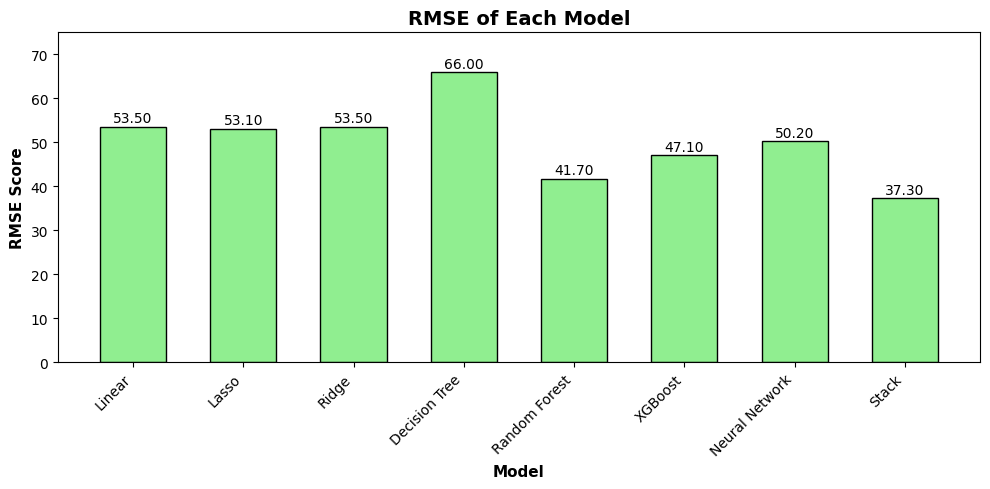

In [35]:
import matplotlib.pyplot as plt
models = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network', 'Stack']
rmse_values = [53.5, 53.1, 53.5, 66.0, 41.7, 47.1, 50.2, 37.3]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, rmse_values, color='lightgreen', edgecolor='black', width=0.6)
plt.xlabel('Model', fontsize=11, fontweight='bold')
plt.ylabel('RMSE Score', fontsize=11, fontweight='bold')
plt.title('RMSE of Each Model', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 75)
for i in range(len(rmse_values)):
    plt.text(i, rmse_values[i] + 1, f'{rmse_values[i]:.2f}', ha = 'center')
plt.show()

Root Mean Squared Error (RMSE) is a key measure of prediction accuracy, quantifying the average size of prediction errors. In this analysis, we evaluate the RMSE values of different models applied to the dataset, from the simplest to the most complex. The performance of each model is analysed in the context of its ability to capture both linear and non-linear relationships, as well as its ability to generalise.

**Linear models: Linear Regression, Lasso and Ridge**

**Linear regression ** (RMSE = 53.5): Linear regression assumes a linear relationship between the input characteristics and the target variable. The relatively high RMSE suggests that the data are likely to contain non-linear relationships or interactions that are not captured by the model. This leads to significant errors because the assumptions of the model do not match the underlying structure of the data.

**Lasso regression** (RMSE = 53.1): Lasso regression introduces L1 regularisation, which not only reduces overfitting but also performs feature selection by reducing some coefficients to zero. The marginal improvement in RMSE over linear regression suggests that although some irrelevant features have been excluded, the model is still constrained by its linear assumptions. Therefore, it cannot fully capture more complex relationships in the data.

**Ridge regression** (RMSE = 53.5): Ridge regression applies L2 regularisation to reduce the effects of multicollinearity by reducing the coefficients of correlated features. The RMSE here is similar to that of Lasso regression, reinforcing the idea that regularisation marginally improves the stability of the model, but does not address the main problem of its inability to effectively model non-linear interactions. Therefore, this model also leads to significant prediction errors.
The high RMSE values of these linear models highlight their inherent limitations when dealing with datasets containing complex interactions, non-linear relationships or irrelevant features. The simplicity of these models leaves a large margin of error as they do not capture the full complexity of the data.

**Decision tree** (RMSE = 66.0): Unlike linear models, decision trees are able to capture non-linear relationships in the data. However, the RMSE for the decision tree is the highest of all the models, indicating slightly worst performance. This is probably due to overfitting, a common problem with decision trees, where the model fits the training data too tightly, learning both signal and noise. As a result, it does not generalise well to unseen data. Without techniques such as pruning or the use of ensemble methods, the decision tree is overly sensitive to variations in the data, resulting in an inflated RMSE.

**Random Forest** (RMSE = 41.7): Random forest, an ensemble method, far outperforms both linear models and the decision tree, achieving a much lower RMSE. By combining predictions from multiple decision trees, Random Forest averages the results to reduce the likelihood of overfitting and improve generalisation. The significant reduction in RMSE indicates that this ensemble approach effectively captures both linear and non-linear relationships in the data, resulting in better performance. The ability of Random Forest to mitigate overfitting while handling complex data structures explains its superiority.

**XGBoost** (RMSE = 47.1): XGBoost also uses decision trees, but uses a gradient boosting framework to iteratively optimise the model. At each step, the model builds a new tree to correct errors in previous trees, improving the model's ability to minimise residuals. Although its RMSE is slightly worse than that of Random Forest, XGBoost is still a significant improvement over linear models, demonstrating its ability to model complex relationships. The slight difference in performance could be due to insufficient adjustment of hyperparameters such as learning rate or tree depth, but the model still excels at capturing intricate patterns in the data.

**Neural Network** (RMSE = 50.2): The neural network has a fair RMSE score, highlighting its strength in modelling highly complex non-linear relationships. Neural networks are particularly adept at identifying subtle interactions within large data sets, making them ideal in situations where traditional models struggle. When properly trained and regularised, neural networks can outperform other models in capturing the full range of non-linear dependencies in the data, however, in this case its RMSE was higher than several other models.

**Stack Model** (RMSE = 37.3) is a method that combines the strengths of multiple models in order to exploit their individual advantages. By integrating predictions from different methods, the stack model achieves robust performance and balances flexibility with stability. The stack model excels in terms of adaptability and robustness, particularly in different datasets.

**Conclusions** The RMSE analysis shows a clear trend that reflects the complexity of the models:
- Linear Models: While offering simplicity and interpretability, their inability to capture non-linearity or interactions leads to high RMSE values.
- Decision Tree: Although capable of modelling non-linear relationships, its tendency to over-fit results in the highest RMSE, indicating poor generalisation.
- Random Forest & XGBoost: Both ensemble methods outperform simpler models, balancing flexibility and robustness. The lower RMSE of Random Forest indicates good generalisation, whileXGBoost, although slightly less accurate due to limitations in tuning hyperparameters, still provides excellent performance.
- Neural Network: While it is not the most accurate model in terms of RMSE, the Neural Network minimises the RMSE to a fair extent, demonstrating its ability to handle complex non-linear relationships and interactions in the dataset.
-Stack Model: Offers a robust approach by combining strengths from multiple models, delivering balanced and reliable performance. This model is has the greatest predictive ability.

The significantly lower RMSE values of Stack, Random Forest, and XGBoost indicate that these models are better suited to the characteristics of the data set. Their ability to model complex non-linear relationships and interactions, together with their robustness to noise, explains their superior performance compared to linear models, which do not take this complexity into account.

## **Analysis of R2 Values**

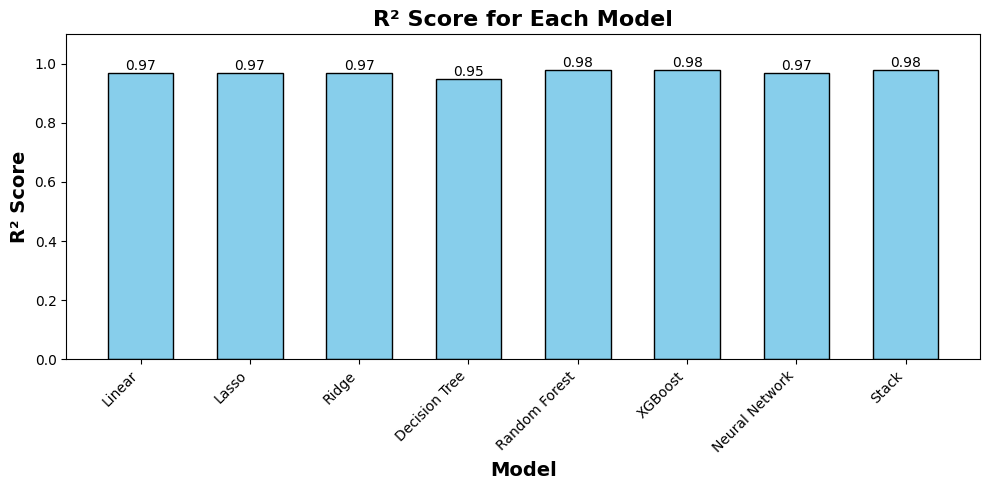

In [36]:
models = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network', 'Stack']
r2_values = [0.97, 0.97, 0.97, 0.95, 0.98, 0.98, 0.97, 0.98]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_values, color='skyblue', edgecolor='black', width=0.6)

plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=14, fontweight='bold')
plt.title('R² Score for Each Model', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 1.1)
for i in range(len(r2_values)):
    plt.text(i, r2_values[i] + 0.01, f'{r2_values[i]:.2f}', ha = 'center')
plt.show()

**Linear models: Linear regression, lasso and ridge**

**The linear regression model** explains 97% of the variance of the variable suggesting that almost all of the variance of the target can be explained by a linear combination of the input variables. This means that the inputs have a strong linear relationship with the target. However, the significant residual errors indicate that there are still aspects not captured such as non-linearity or interactions between variables.

**Lasso regression (R² = 0.97) and Ridge regression (R² = 0.97):**

Both Lasso and Ridge regression produce R² scores identical to those of linear regression. These regularised versions offer improvements in stability and mitigate overfitting by penalising large coefficients. However, the overall explanatory power is not significantly improved. This means that irrelevant features do not have a significant influence on the variance explanation.
The high R² values in linear models suggest that the target variable is predominantly influenced by a few key characteristics that are well captured by linear models. However, the higher RMSE observed in these models underlines their limitations in capturing complex relationships, leading to larger prediction errors despite their strong explanatory power.

**Decision Tree (R² = 0.95)**

The decision tree model scores R² = 0.95. Although capable of capturing non-linear relationships, the model has a tendency to overfitting, i.e. to over-fit to the specific details of the training data, losing the ability to perform equally well on new data. This limits its ability to generalise, i.e. to apply effectively to situations other than those seen in the training phase.

**Random Forest (R² = 0.98)**

Random Forest achieves an R² score of 0.98. By aggregating the results of multiple decision trees, Random Forest is able to effectively capture both linear and non-linear relationships. Combining multiple trees helps mitigate overfitting, improving performance compared to individual decision trees.

**XGBoost (R² = 0.98)**

XGBoost also achieves a score of R² = 0.98, demonstrating its effectiveness in handling complex relationships through gradient boosting. XGBoost's sequential optimisation process allows a better reduction of residual error, which increases its explanatory power.

**Neural Network (R² = 0.97)**

The neural network model achieves a score of R² = 0.97, reflecting its ability to model intricate, non-linear relationships between input characteristics and the target variable. The structure of the neural network allows more complex patterns to be captured in the data.

**Stack Model (R² = 0.98)**

The stack model achieves a score of R² = 0.98, reflecting its ability to model intricate, non-linear relationships between input characteristics and the target variable. This is the best performing model, demonstrated by its high R-squared value and low RMSE.

**Interpreting the High R² Scores:**

Among the models tested, R² scores ranged from 0.95 to 0.98, suggesting an overall solid performance as values closer to 1 indicate better performance. The high performance indicates that the data set is well structured and that the target variable is highly predictable based on the characteristics provided This indicates:

- The presence of strong linear and non-linear relationships between the characteristics and the target variable.
- A dataset with minimal noise or random variability.
- The dataset was prepared in such a way as to include only the most useful and relevant variables for predicting the target.

**Linear models**: High R² values demonstrate good explanatory power, but are limited by the inability to minimise prediction errors, as evidenced by the higher RMSE.

**Stack model** High R² combined with lower RMSE values indicate superior generalisation and predictive accuracy, with tree-based models effectively balancing flexibility and robustness.

**Conclusion**: More advanced models such as Random Forest, XBoost and stack models manage to capture both simple and more complex and subtle relationships within the dataset. In contrast, simpler models such as linear regression or single decision trees only manage to capture simpler relationships and cannot fully handle interactions between variables or the more complicated dynamics of the data.

**Model Chosen for Marriages Data App**

Stack Model

**References**

1. DeepL SE. (2024). DeepL translator – The world's most accurate translator. DeepL. https://www.deepl.com/translator

2. OpenAI. (2024). ChatGPT (December 9 version) [Large language Model]. https://chatgpt.com/